## <center>Deakin University</center>
### <center>SIG742: Modern Data Science</center>
### <center>End Term Assessment Task </center>
### <center>Trimester 2, 2023</center>
### Submitted by
#### Ramchandar Mariappan- 223914532
#### Simranjit Singh- 223925193
#### Uthara Ravichanthar- 223914668
#### 08/10/2023

#### Instructions
Assignment Questions

There are total 2 parts in this assessment task:

Part 1 The first part will focus on the data acquisition and manipulation which includes the numpy, the
pandas, the Data Wrangling, the EDA from M03, and M04.

Part 2 The second part will require to perform the time series analysis exercise, which includes the time
series, the ARIMA, the Isolation Forest M05.


### Part I
#### Data Acquisition and Manipulation

There are 10 questions in this part for total 60 marks, and each question is for 5 marks.

The quality of your explanation in the report and video will be 10 marks for all questions. You are required to use Google Colab to finish all the coding in the code block cell, and provide sufficient coding comments, and also save the result of running as well.

**Dataset:**
The (Item_listing_category.zip) data used for this part could be found in here. You will need to use Pandas to read the unzipped (csv) data for starting.


**Pre requisites and prepartaion**

In [57]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
#download the file from githug
os.system("wget https://github.com/tulip-lab/sit742/raw/develop/Jupyter/data/item_listing_category.zip")

0

In [ ]:
import os
current_directory = os.getcwd()
print(current_directory)


/content


In [ ]:
# Specify the path to the downloaded ZIP file
zip_file_path = "/content/item_listing_category.zip"

# Specify the directory where you want to extract the contents
extracted_dir_path = "/content"

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# Specify the path to the CSV file within the extracted contents
csv_file_path = os.path.join(extracted_dir_path, "item_list.csv")



In [2]:
#read the csv file.
item_list_df =pd.read_csv("/content/item_listing_category.csv")

In [3]:
#Loading top data
item_list_df.head()

train_id                            name  item_condition_id  \
0    128037        Bundle for Sassy Sisters                  3   
1    491755                    PINK VS TANK                  2   
2    470924      Funko Pop Unmasked Cyclops                  1   
3    491263                 Baby Roshe Runs                  3   
4    836489  Baby Girl Ralph Lauren dresses                  3   

                        category_name    brand_name  price  shipping  \
0         Women/Tops & Blouses/Blouse           NaN   16.0         0   
1     Women/Tops & Blouses/Tank, Cami           NaN   17.0         0   
2  Kids/Toys/Action Figures & Statues         Funko   30.0         1   
3               Kids/Boys 2T-5T/Shoes          Nike   19.0         0   
4         Kids/Girls 0-24 Mos/Dresses  Ralph Lauren   24.0         0   

                                   clean_description  
0  max cleo black dress paper crane black tank to...  
1       sequin pink sign sequins missing gently worn  
2  box great condition comes soft pop protector p...  
3                 baby black nike roshe runs size 5c  
4  2 polo dresses 3 months wore washed dreft pink...

In [4]:
#Loading bottom data
item_list_df.tail()

train_id                                     name  item_condition_id  \
355803    760377                  Beats By Dre Solo White                  3   
355804    780889  4 New Leap Frog Leapster Learning Games                  1   
355805    650579                    Torrid bra size 42ddd                  3   
355806    481154                               Vans shoes                  2   
355807    361073    Kendra Scott Alex earrings in Magenta                  2   

                                          category_name    brand_name  price  \
355803  Electronics/TV, Audio & Surveillance/Headphones         Beats   45.0   
355804                   Kids/Toys/Learning & Education     Leap Frog    9.0   
355805                             Women/Underwear/Bras        Torrid   20.0   
355806                       Men/Shoes/Fashion Sneakers          VANS   23.0   
355807                           Women/Jewelry/Earrings  Kendra Scott   38.0   

        shipping                                  clean_description  
355803         1        beats dre solo white gently used work great  
355804         1  viewing 4 new leap frog leapster learning game...  
355805         1  couple places lace snagged tell fairly good co...  
355806         0                                            size 11  
355807         1                                    description yet

In [5]:
# Get information about the dataset
item_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355808 entries, 0 to 355807
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           355808 non-null  int64  
 1   name               355808 non-null  object 
 2   item_condition_id  355808 non-null  int64  
 3   category_name      354269 non-null  object 
 4   brand_name         203852 non-null  object 
 5   price              355808 non-null  float64
 6   shipping           355808 non-null  int64  
 7   clean_description  355614 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 21.7+ MB


From the information above, first checking the data types
1. There are integers, float and object classification of variables by python.
2. The train_id may not be a required column, so it will be dropped from the data fram
3. item condition id - ranges from 1 to 5 as values
4. price - right classification to be on float so changes are required
5. shipping is more binary 0 and 1
6. Rest are classified as object variables and there is no changes needed

In [6]:
# Describing the dataset
item_list_df.describe(include='all').T

count  unique  \
train_id           355808.0     NaN   
name                 355808  277067   
item_condition_id  355808.0     NaN   
category_name        354269    1135   
brand_name           203852    3046   
price              355808.0     NaN   
shipping           355808.0     NaN   
clean_description    355614  267826   

                                                              top   freq  \
train_id                                                      NaN    NaN   
name                                                       Bundle    522   
item_condition_id                                             NaN    NaN   
category_name      Women/Athletic Apparel/Pants, Tights, Leggings  14336   
brand_name                                                   PINK  13376   
price                                                         NaN    NaN   
shipping                                                      NaN    NaN   
clean_description                                 description yet  19868   

                            mean            std  min        25%       50%  \
train_id           593110.518215  342519.488239  1.0  296508.25  593288.5   
name                         NaN            NaN  NaN        NaN       NaN   
item_condition_id       1.910128          0.904  1.0        1.0       2.0   
category_name                NaN            NaN  NaN        NaN       NaN   
brand_name                   NaN            NaN  NaN        NaN       NaN   
price                  26.661885      38.146767  0.0       10.0      17.0   
shipping                0.446151       0.497092  0.0        0.0       0.0   
clean_description            NaN            NaN  NaN        NaN       NaN   

                         75%        max  
train_id           890472.25  1186024.0  
name                     NaN        NaN  
item_condition_id        3.0        5.0  
category_name            NaN        NaN  
brand_name               NaN        NaN  
price                   29.0     2000.0  
shipping                 1.0        1.0  
clean_description        NaN        NaN

If we focus on Price , mostly that is the target variable . The mean is around 26 and at 75% ut is 29 and have some max of 2000. Obvioulsly there seems to be outliers since the 75% is almost close to the mean

In [7]:
#check for null values
item_list_df.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          1539
brand_name           151956
price                     0
shipping                  0
clean_description       194
dtype: int64

In [8]:
#Identify total length to use for percentage calculations
leng_item_list_df = len(item_list_df)
print(leng_item_list_df)

355808


In [9]:
Percentage_null= item_list_df.isnull().sum()/leng_item_list_df*100

In [10]:
#Percentage of teh null values
Percentage_null

train_id              0.000000
name                  0.000000
item_condition_id     0.000000
category_name         0.432537
brand_name           42.707303
price                 0.000000
shipping              0.000000
clean_description     0.054524
dtype: float64

While category_name has  0.4% null values which can be imputed but the brand_name has 42% null values which can't be imputed. so i wil be imputing as "unknown" . Clean description has 0.05% of null values. All three columns that has null values are categorical and not numerical

In [11]:
# Identify for any duplicate values
item_list_df.duplicated().sum()

48572

In [12]:
#Identify what % of duplicates on the total
item_list_df.duplicated().sum()/leng_item_list_df*100

13.651182660311179

Around 13% duplicate values exist in the data set. It can be removed but the steps will be executed later

In [13]:
# Shape of the dataset
item_list_df.shape
print(f"The total number of rows " ,item_list_df.shape[0], "and total number of columns", item_list_df.shape[1])

The total number of rows  355808 and total number of columns 8


<Axes: title={'center': 'price distribution plot'}, xlabel='price', ylabel='Density'>

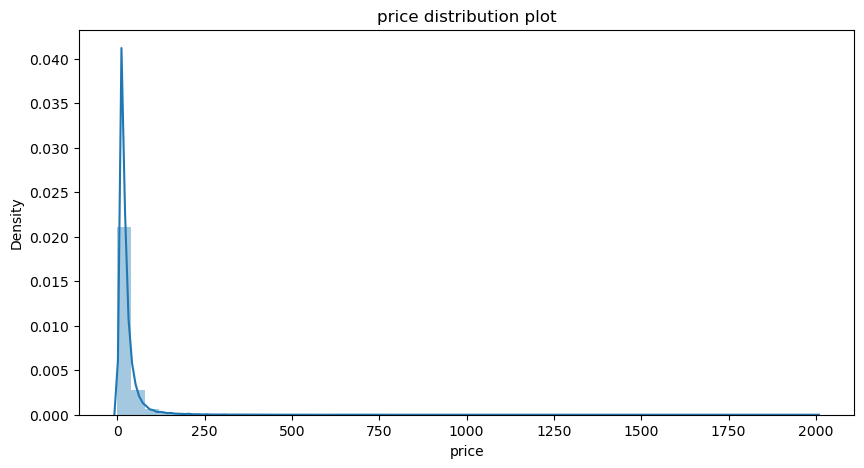

In [14]:
#plot age, account_balance, duration
plt.figure(figsize=(10,5))
plt.title("price distribution plot")
sns.distplot(item_list_df['price'])

In [15]:
item_list_df['price'].skew()

11.429698667933051

 A skewness value of 11.429698667933051 indicates a highly positively skewed distribution, as it is significantly greater than 1

<Axes: >

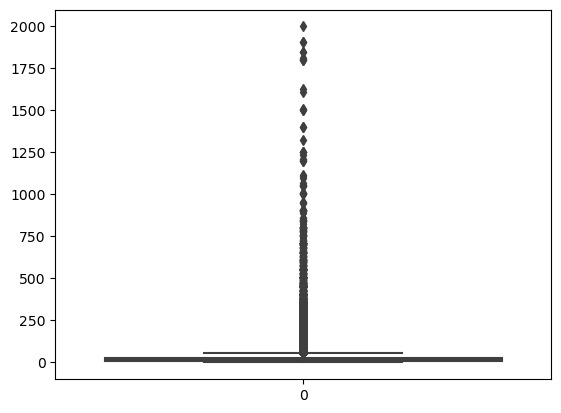

In [16]:
# Outlier checking
sns.boxplot(item_list_df.price)

It is very clear the price has a good outlier in the dataset. For any modelling this needs to be treated

In [17]:
#split categorical variables and numerical variables
cat=[]
num=[]
for i in item_list_df.columns:
  if item_list_df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print(cat)
print(num)

['name', 'category_name', 'brand_name', 'clean_description']
['train_id', 'item_condition_id', 'price', 'shipping']


Questions and Answers:

**Question 1. 1**


Find the missing values:
• Write the function missing_values_table and use the dataframe as the input. The function
should return the information of missing values by column (only for columns which have
missing values and the returned value should be the count of rows has missing values);

----------------

• For columns which have missing values, could you impute the missing values with the
mean value of the particular columns? (if you think it could not be done with mean value,
write down the reason in comments and report rather than code)

**Answer for identifying the missing values columns**

In [18]:
# Define the missing_values_table function
def missing_values_table(item_list_df):
    # Calculate the total number of missing values per column
    missing_count = item_list_df.isnull().sum()

    # Filter columns with missing values (count > 0)
    missing_count = missing_count[missing_count > 0]

    # Calculate the percentage of missing values per column
    missing_percentage = (missing_count / len(item_list_df)) * 100

    # Create a DataFrame to display the missing value information
    missing_table = pd.DataFrame({
        'Missing Values rows': missing_count,
        'Missing Values Percentage': missing_percentage
    })

    return missing_table

# Use the missing_values_table function
missing_info = missing_values_table(item_list_df)

# Print the missing value information
print("Missing Values Information:")
print(missing_info)


Missing Values Information:
                   Missing Values rows  Missing Values Percentage
category_name                     1539                   0.432537
brand_name                      151956                  42.707303
clean_description                  194                   0.054524


**Answer for commenting on whether imputation can be done using mean values**

In [19]:
item_list_df['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings    14336
Women/Tops & Blouses/T-Shirts                     11187
Beauty/Makeup/Face                                 8234
Beauty/Makeup/Lips                                 7188
Electronics/Video Games & Consoles/Games           6391
                                                  ...  
Handmade/Patterns/Handmade                            1
Vintage & Collectibles/Serving/Glassware              1
Handmade/Clothing/Dress                               1
Handmade/Pets/Toy                                     1
Handmade/Books and Zines/Comic                        1
Name: category_name, Length: 1135, dtype: int64

In [20]:
item_list_df['brand_name'].value_counts()

PINK                 13376
Nike                 13182
Victoria's Secret    11544
LuLaRoe               7272
Apple                 3962
                     ...  
Cotton Express           1
Gold's Gym               1
Audi                     1
Alstyle Apparel          1
Doncaster                1
Name: brand_name, Length: 3046, dtype: int64

In [21]:
item_list_df['clean_description'].value_counts()

description yet                                                                                                                                                                                                                                                                                 19868
brand new                                                                                                                                                                                                                                                                                        1285
new                                                                                                                                                                                                                                                                                              1281
good condition                                                                                                        

All three variables which has missing values are categorical. Categorical variables cannot be imputed using a mean approach. Mean approach can be used only for continous variables

Mode Imputation: This is a common choice when dealing with categorical data.
K-Nearest Neighbors (K-NN) Imputation: This method imputes missing categorical values based on the categories of their nearest neighbors in the dataset

**Question 1. 2**

Find the price information from the data:

• Write code to print the median price of the items in the data;

• What is the 90th percentile value on the price;

• Draw the histogram chart for the price of the items in the data with 50 bins.


Answer for Q: • Write code to print the median price of the items in the data;

In [22]:
median_price = item_list_df['price'].median()
print(f'The median price of the items in the data is', median_price)

The median price of the items in the data is 17.0


Answer for Q: • What is the 90th percentile value on the price;


In [23]:
# Calculate the 90th percentile using numpy.percentile
percentile_90 = np.percentile(item_list_df['price'], 90)
print(f'90th Percentile Price:', percentile_90)


90th Percentile Price: 51.0


Answer for Q: Draw the histogram chart for the price of the items in the data with 50 bins.

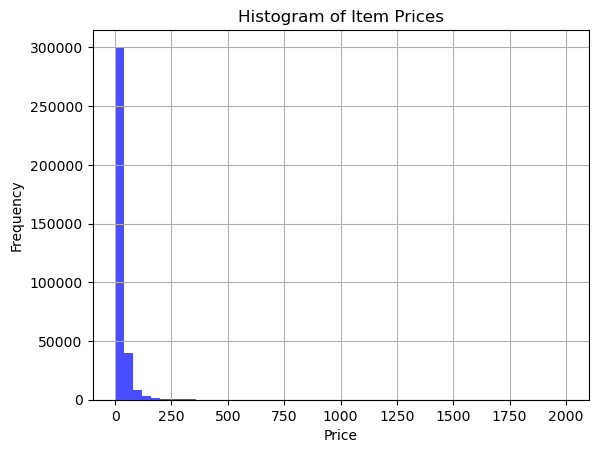

In [24]:
# Specify the number of bins
num_bins = 50

# Plot the histogram
plt.hist(item_list_df['price'], bins=num_bins, color='blue', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Item Prices')
plt.grid(True)

# Show the plot
plt.show()


#### Question 1.3
Exploring the shipping information from the data:

• Write code to find out the percentage of the items that are paid by the buyers.

• Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer
pays shipping (50 bins).

• When buying the items online, do you need to pay higher price if seller pays for the shipping? Write the code to find out (Compare the median price of items paid by buyers and items paid by sellers, and explain the result in the comment and report).


(Optional: You could use the subplot from EDA)

In [25]:
#Find the value counts of the shipping
item_list_df['shipping'].value_counts()

0    197064
1    158744
Name: shipping, dtype: int64

Answer for:  Write code to find out the percentage of the items that are paid by the buyers.

Please Note* Assuming when shipping is 0 - then paid by buyers & 1 - then paid by sellers [ This is not given in the problem statement]

In [26]:
#Taking the first value which is shipping as 0
items_buyers = item_list_df['shipping'].value_counts()[0]
#identifying the total records using the len function
leng_item_list_df = len(item_list_df)
#percentage is dividing the first value from the value counts and the total
#records found using len function. Also it is rounded for 2 digits
Percentage_buyers = round(items_buyers/leng_item_list_df*100,2)
#print function to print the value
print(f'The percentage of items that are paid by buyers',Percentage_buyers, '%')

The percentage of items that are paid by buyers 55.38 %


Answer for: Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer pays shipping (50 bins).

Please Note* Assuming when shipping is 0 - then paid by buyers & 1 - then paid by sellers [ This is not given in the problem statement]



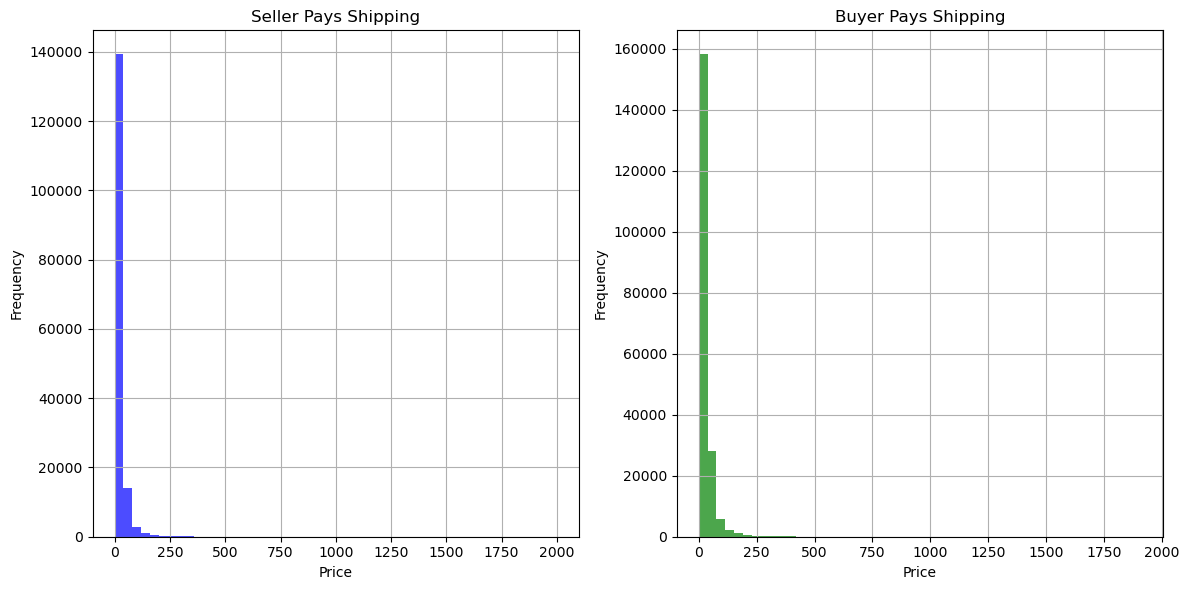

In [27]:
# Filter the DataFrame to separate data based on shipping category
seller_pays_shipping = item_list_df[item_list_df['shipping'] == 1]['price']
buyer_pays_shipping = item_list_df[item_list_df['shipping'] == 0]['price']

# Specify the number of bins (50 in this case)
num_bins = 50

# Create subplots for side-by-side histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram for seller pays shipping
axs[0].hist(seller_pays_shipping, bins=num_bins, color='blue', alpha=0.7)
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Seller Pays Shipping')
axs[0].grid(True)

# Plot the histogram for buyer pays shipping
axs[1].hist(buyer_pays_shipping, bins=num_bins, color='green', alpha=0.7)
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Buyer Pays Shipping')
axs[1].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Answer for : When buying the items online, do you need to pay higher price if seller pays for the shipping? Write the code to find out (Compare the median price of items paid by buyers and items paid by sellers, and explain the result in the comment and report).

(Optional: You could use the subplot from EDA)

In [28]:
# Filter the DataFrame to separate data based on shipping category
seller_pays_shipping = item_list_df[item_list_df['shipping'] == 1]['price'].median()
buyer_pays_shipping = item_list_df[item_list_df['shipping'] == 0]['price'].median()

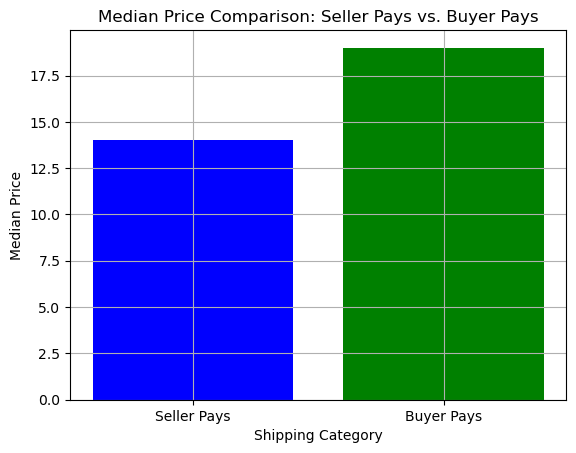

On comparison of when the price is higher between seller and buyer pays for shipping:

The median price when seller pays is 14.0
The median price when buyer pays is 19.0
On average, items paid by buyers have a higher median price.


In [29]:

# Filter the DataFrame for items paid by sellers and buyers
seller_pays_shipping = item_list_df[item_list_df['shipping'] == 1]['price']
buyer_pays_shipping = item_list_df[item_list_df['shipping'] == 0]['price']

# Calculate the median price for each category
median_price_seller_pays = seller_pays_shipping.median()
median_price_buyer_pays = buyer_pays_shipping.median()
# Create a bar plot to compare median prices
plt.bar(['Seller Pays', 'Buyer Pays'], [median_price_seller_pays, median_price_buyer_pays], color=['blue', 'green'])
plt.xlabel('Shipping Category')
plt.ylabel('Median Price')
plt.title('Median Price Comparison: Seller Pays vs. Buyer Pays')
plt.grid(True)

# Show the plot
plt.show()

# Calculate the price difference
price_difference = median_price_buyer_pays - median_price_seller_pays

# Report the results
print(f'On comparison of when the price is higher between seller and buyer pays for shipping:\n')
print(f'The median price when seller pays is', median_price_seller_pays)
print(f'The median price when buyer pays is', median_price_buyer_pays)
if price_difference < 0:
    print("On average, items paid by sellers have a higher median price.")
elif price_difference > 0:
    print("On average, items paid by buyers have a higher median price.")
else:
    print("There is no significant difference in the median prices.")


#### Question 1.4
Write the code to find out (print) the count of the rows on each number (value) in column
item_condition_id.

In [30]:
item_list_df['item_condition_id'].value_counts()

1    153402
3    104248
2     89843
4      7768
5       547
Name: item_condition_id, dtype: int64

Draw the boxplot graphs (one plot) on the price for each item condition value, and find out
out whether the better condition of the item could have higher median price

In [31]:
def generateBoxPlots(df):
    totalGroups=df.groupby('item_condition_id').groups
    n=len(totalGroups.keys())
    cols=2
    rows=n//cols+(n%cols>0)
    plt.figure(figsize=(20,20))
    for k in totalGroups.keys():
        ax=plt.subplot(rows,cols,k)
        df_group=df.groupby('item_condition_id').get_group(k)
        median_val=df_group['price'].median()
        plt.title(f"Item condition category {k} \n Median price: {median_val}",fontweight="bold")
        sns.boxplot(data=df_group,x="price",palette="Set2")

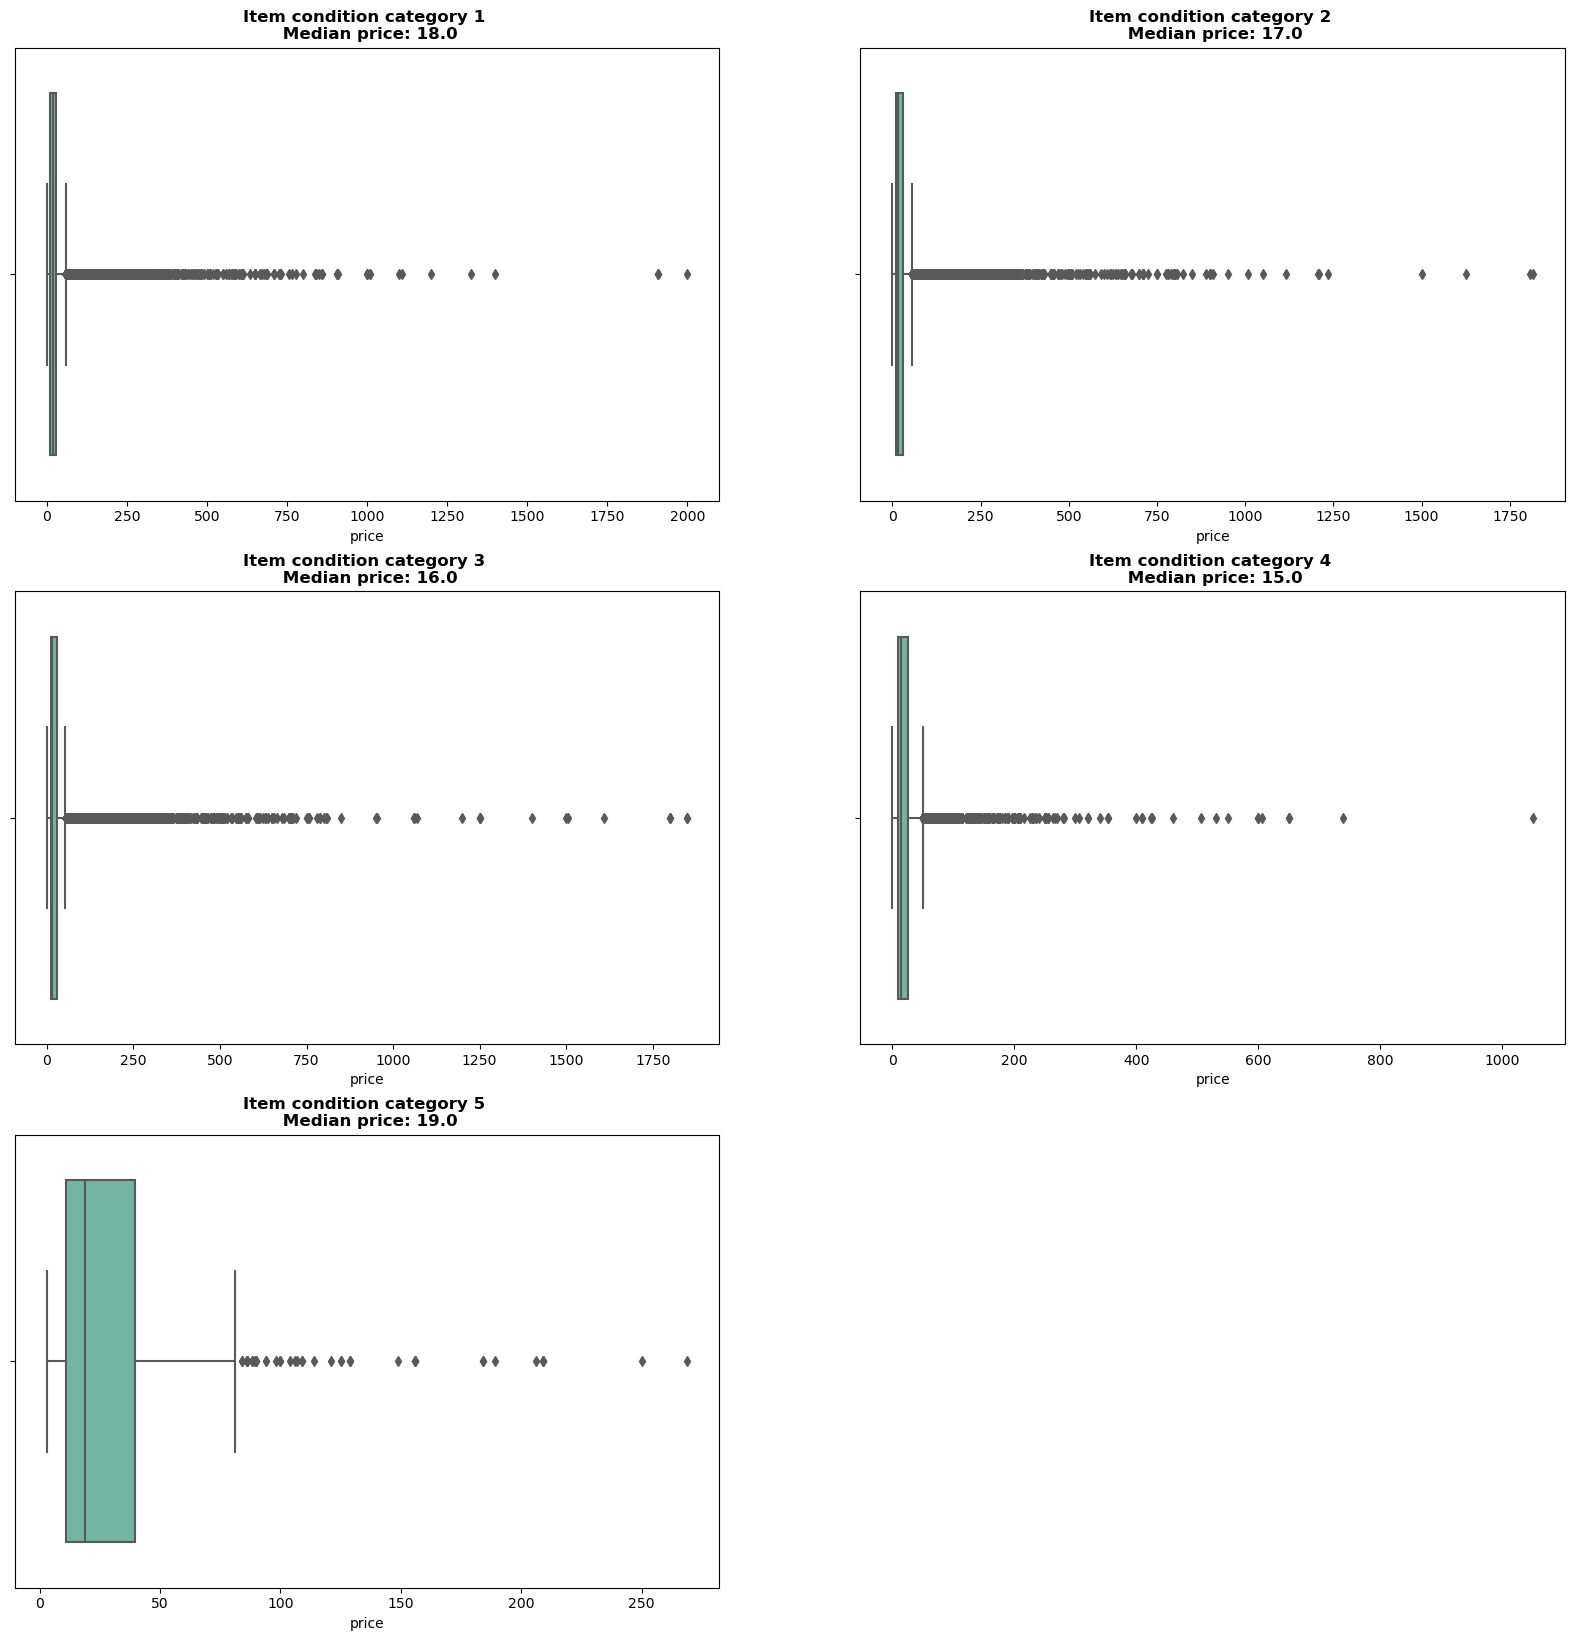

In [32]:
generateBoxPlots(item_list_df)

Median price for best condition category is i.e category 1 is 19

#### Question 1.5
Write the code to find out (print) how many unique categories you could find from column
category_name

In [33]:
#Using value counts printing unique categories in descinding order of frequency
pd.set_option("display.max_rows", None)
item_list_df['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings                       14336
Women/Tops & Blouses/T-Shirts                                        11187
Beauty/Makeup/Face                                                    8234
Beauty/Makeup/Lips                                                    7188
Electronics/Video Games & Consoles/Games                              6391
Beauty/Makeup/Eyes                                                    6197
Electronics/Cell Phones & Accessories/Cases, Covers & Skins           5881
Women/Underwear/Bras                                                  5076
Women/Tops & Blouses/Tank, Cami                                       4876
Women/Tops & Blouses/Blouse                                           4858
Women/Dresses/Above Knee, Mini                                        4826
Women/Athletic Apparel/Shorts                                         4721
Women/Jewelry/Necklaces                                               4634
Beauty/Fragrance/Women   

In [34]:
print("Number of unique categories ",len(item_list_df['category_name'].value_counts()))

Number of unique categories  1135


For the items with worst condition only (highest value from item_condition_id), write code
to (print) find out the top 3 categories

In [35]:
#Using group by to group all data in based on worst item condition i.e. 5.
df_group=item_list_df.groupby('item_condition_id').get_group(5)
#Using values counts to get number and frequency of unique categories in category 5
categories=df_group['category_name'].value_counts()
#Printing top 3 categories based on items with worst condition
categories.head(3)

Electronics/Cell Phones & Accessories/Cell Phones & Smartphones    137
Electronics/Video Games & Consoles/Games                            42
Electronics/Video Games & Consoles/Consoles                         35
Name: category_name, dtype: int64

#### Question 1.6

Write the function (must be function) to split the text content (string value in each row) in
column category_name by ’/’ character

In [36]:
def createSubCategories(df):
    #extract category data
    category_data=df['category_name']
    main_cat=[]
    sub_cat_1=[]
    sub_cat_2=[]
    unknown_val="Category Unknown"
    #iterate category series data and append the categories in main_cat,sub_cat_1,sub_cat_2 list
    for (i,val) in category_data.items():
        if(pd.isna(val)):
            main_cat.append(unknown_val)
            sub_cat_1.append(unknown_val)
            sub_cat_2.append(unknown_val)
        else:
            data=val.split('/')
            if(len(data)<1):
                print("zerodata")
                main_cat.append(unknown_val)
                sub_cat_1.append(unknown_val)
                sub_cat_2.append(unknown_val)
            else:
                main_cat.append(data[0])
                sub_cat_1.append(data[1])
                sub_cat_2.append(data[2])
    df['main_cat']=main_cat
    df['sub_cat_1']=sub_cat_1
    df['sub_cat_2']=sub_cat_2

In [37]:
createSubCategories(item_list_df)

 Print out the dataframe to show the top 5 rows for three new columns main_cat,subcat_1 and subcat_2

In [38]:
item_list_df[['main_cat', 'sub_cat_1','sub_cat_2']].head(5)

main_cat       sub_cat_1                 sub_cat_2
0    Women  Tops & Blouses                    Blouse
1    Women  Tops & Blouses                Tank, Cami
2     Kids            Toys  Action Figures & Statues
3     Kids      Boys 2T-5T                     Shoes
4     Kids  Girls 0-24 Mos                   Dresses

As observed above top 5 records for dataframe and new added colums for main_cat,subcat_1 and subcat_2

#### Question 1.7

Write code (or function) to change the text (value in each row) from the new three columns
to lowercase

In [39]:
def seriesToLower(df):
    df['main_cat'] = df['main_cat'].apply(lambda x : x.lower())
    df['sub_cat_1'] = df['sub_cat_1'].apply(lambda x : x.lower())
    df['sub_cat_2'] = df['sub_cat_2'].apply(lambda x : x.lower())

seriesToLower(item_list_df)

In [45]:
item_list_df.head()

train_id                            name  item_condition_id  \
0    128037        Bundle for Sassy Sisters                  3   
1    491755                    PINK VS TANK                  2   
2    470924      Funko Pop Unmasked Cyclops                  1   
3    491263                 Baby Roshe Runs                  3   
4    836489  Baby Girl Ralph Lauren dresses                  3   

                        category_name    brand_name  price  shipping  \
0         Women/Tops & Blouses/Blouse           NaN   16.0         0   
1     Women/Tops & Blouses/Tank, Cami           NaN   17.0         0   
2  Kids/Toys/Action Figures & Statues         Funko   30.0         1   
3               Kids/Boys 2T-5T/Shoes          Nike   19.0         0   
4         Kids/Girls 0-24 Mos/Dresses  Ralph Lauren   24.0         0   

                                   clean_description main_cat       sub_cat_1  \
0  max cleo black dress paper crane black tank to...    women  tops & blouses   
1       sequin pink sign sequins missing gently worn    women  tops & blouses   
2  box great condition comes soft pop protector p...     kids            toys   
3                 baby black nike roshe runs size 5c     kids      boys 2t-5t   
4  2 polo dresses 3 months wore washed dreft pink...     kids  girls 0-24 mos   

                  sub_cat_2  
0                    blouse  
1                tank, cami  
2  action figures & statues  
3                     shoes  
4                   dresses

Draw the bar chart to find out the top 5 most popular main categories (in column main_cat)
in the data

<Axes: >

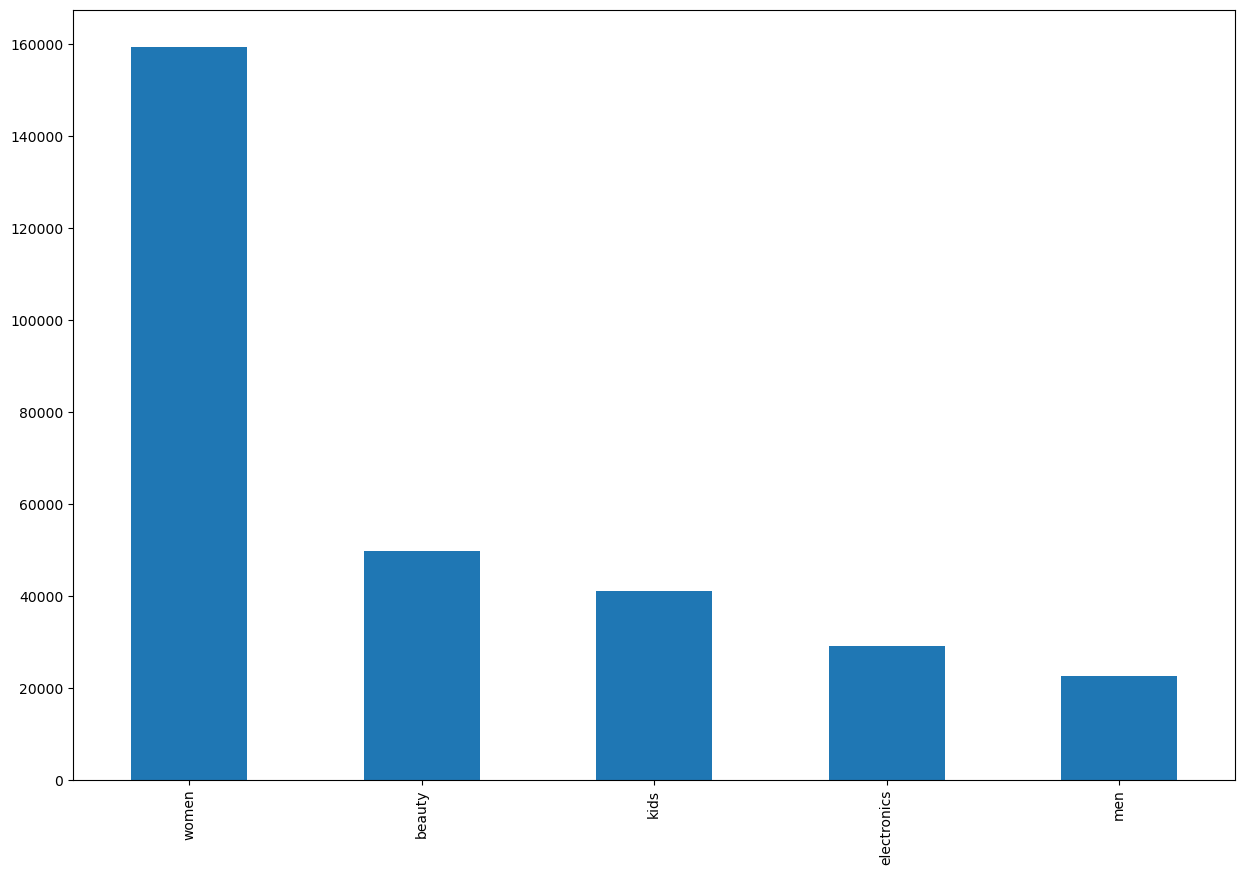

In [46]:
fig = plt.subplots(figsize=(15, 10))
hist_data=item_list_df['main_cat'].value_counts().head(5)
hist_data.plot(kind='bar')

Write code (or function) to (print) find out how many unique main categories (in col umn
main_cat), unique first sub-categories (in column subcat_1) and unique second
sub-categories (in column subcat_2) respectively

In [47]:
print("Number of unique main categories ",len(item_list_df['main_cat'].value_counts()))
print("Number of unique sub_cat_1 categories ",len(item_list_df['sub_cat_1'].value_counts()))
print("Number of unique sub_cat_2 categories ",len(item_list_df['sub_cat_2'].value_counts()))

Number of unique main categories  11
Number of unique sub_cat_1 categories  114
Number of unique sub_cat_2 categories  788


Question 1.8

Exploring the price and categories.
• Write code to (print) find out the median price for all the categories in new column main_cat.
• Draw the bar chart to find out the top 10 most expensive first sub-categories (in column
subcat_1) in the data.
• Draw the bar chart to find out the top 10 cheapest second sub-categories (in column
subcat_2) in the data.

The median prices for all categories in main_cat are: 
main_cat
beauty                    15.0
category unknown          18.0
electronics               15.0
handmade                  12.0
home                      18.0
kids                      14.0
men                       21.0
other                     14.0
sports & outdoors         16.0
vintage & collectibles    16.0
women                     19.0
Name: price, dtype: float64


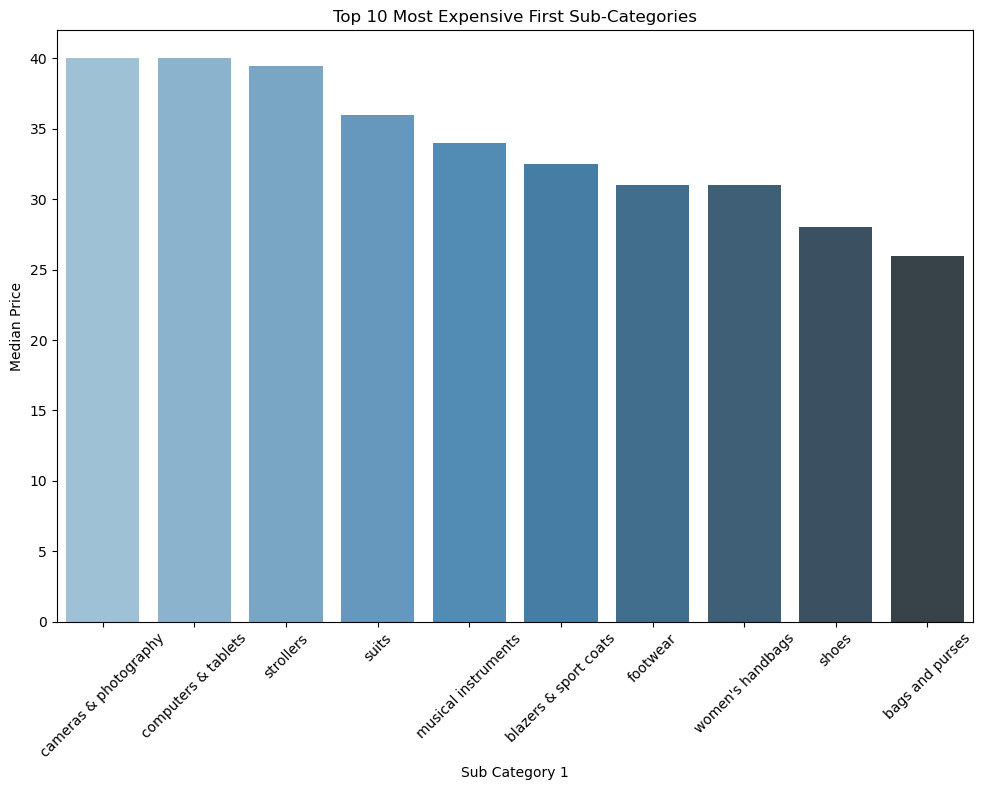

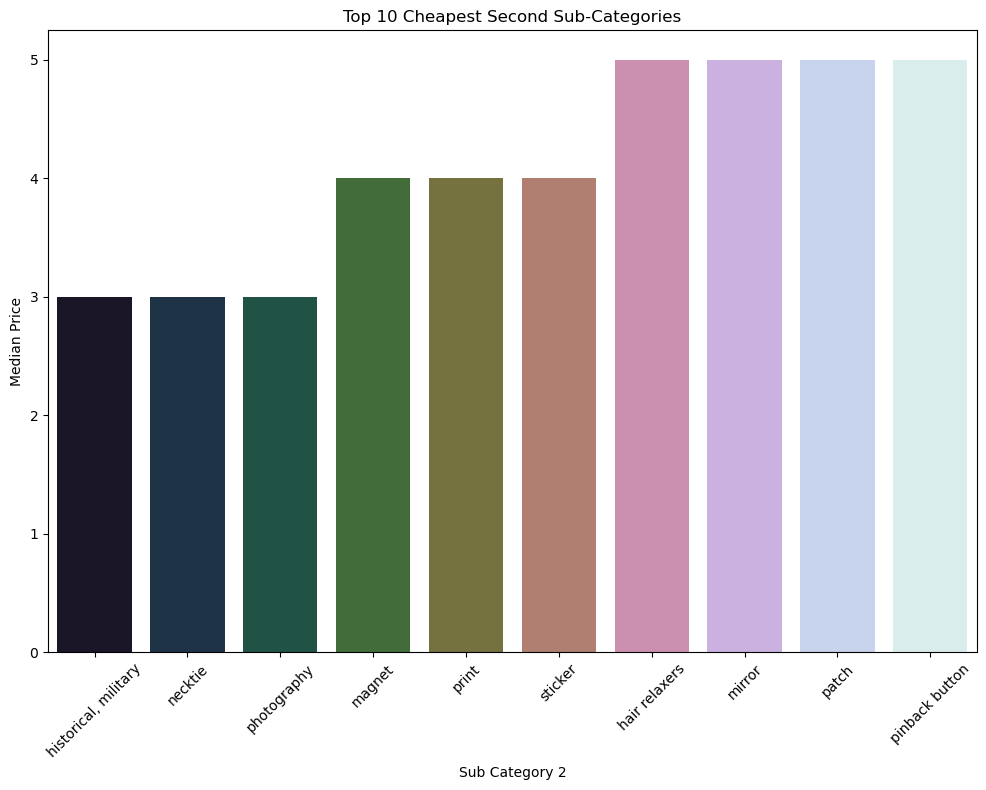

In [48]:
# Finding Median price for all categories in column main_cat
median_prices = item_list_df.groupby('main_cat')['price'].median()
print("The median prices for all categories in main_cat are: ")
print(median_prices)

# Finding Top 10 most expensive first sub-categories in column subcat_1
top10_expSubCat1 = item_list_df.groupby('sub_cat_1')['price'].median().nlargest(10)
plt.figure(figsize=(10, 8))
sns.barplot(x=top10_expSubCat1.index, y=top10_expSubCat1.values, palette='Blues_d')
plt.title('Top 10 Most Expensive First Sub-Categories')
plt.ylabel('Median Price')
plt.xlabel('Sub Category 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Finding Top 10 cheapest second sub-categories in column subcat_2
top10_expSubCat2 = item_list_df.groupby('sub_cat_2')['price'].median().nsmallest(10)
plt.figure(figsize=(10, 8))
sns.barplot(x=top10_expSubCat2.index, y=top10_expSubCat2.values, palette='cubehelix')
plt.title('Top 10 Cheapest Second Sub-Categories')
plt.ylabel('Median Price')
plt.xlabel('Sub Category 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Question 1.9

Exploring the price and brand.
• Write code to (print) find out the median price for all the brands (fill NaN with ’brand
unavailable’).
• Draw the bar chart to find out the top 10 most popular brands in the data.

In [49]:
item_list_df.head()

train_id                            name  item_condition_id  \
0    128037        Bundle for Sassy Sisters                  3   
1    491755                    PINK VS TANK                  2   
2    470924      Funko Pop Unmasked Cyclops                  1   
3    491263                 Baby Roshe Runs                  3   
4    836489  Baby Girl Ralph Lauren dresses                  3   

                        category_name    brand_name  price  shipping  \
0         Women/Tops & Blouses/Blouse           NaN   16.0         0   
1     Women/Tops & Blouses/Tank, Cami           NaN   17.0         0   
2  Kids/Toys/Action Figures & Statues         Funko   30.0         1   
3               Kids/Boys 2T-5T/Shoes          Nike   19.0         0   
4         Kids/Girls 0-24 Mos/Dresses  Ralph Lauren   24.0         0   

                                   clean_description main_cat       sub_cat_1  \
0  max cleo black dress paper crane black tank to...    women  tops & blouses   
1       sequin pink sign sequins missing gently worn    women  tops & blouses   
2  box great condition comes soft pop protector p...     kids            toys   
3                 baby black nike roshe runs size 5c     kids      boys 2t-5t   
4  2 polo dresses 3 months wore washed dreft pink...     kids  girls 0-24 mos   

                  sub_cat_2  
0                    blouse  
1                tank, cami  
2  action figures & statues  
3                     shoes  
4                   dresses

In [153]:
na_brands=item_list_df[item_list_df['brand_name'].isna()==True]
print("Rows with NaN in 'brand' column:\n", na_brands)

Rows with NaN in 'brand' column:
 Empty DataFrame
Columns: [train_id, name, item_condition_id, category_name, brand_name, price, shipping, clean_description, main_cat, sub_cat_1, sub_cat_2, quantile]
Index: []


In [52]:
# Replacing NaN values in column 'brand' with 'brand unavailable'
item_list_df['brand_name'].fillna('brand unavailable', inplace=True)

# Finding median price for all brands
median_prices_brand = item_list_df.groupby('brand_name')['price'].median()
print(median_prices_brand)



brand_name
% Pure                                      14.0
10.Deep                                     18.0
21men                                       10.0
3.1 Phillip Lim                            232.5
3M®                                         15.0
47 Brand                                    11.5
5.11 Tactical                               28.0
5th & Ocean                                 20.0
7 For All Mankind®                          24.0
90 Degree By Reflex                         12.5
A Bathing Ape                               40.0
A Pea In The Pod                            18.0
A Plus Child Supply                          8.0
A Wish Come True                           189.0
A&A Optical                                 24.0
A&R Sports                                  26.0
A+D                                         15.0
A-Shirt                                     11.5
A. Byer                                     14.0
A.B.S. by Allen Schwartz                     3.0
A.D. Sutt

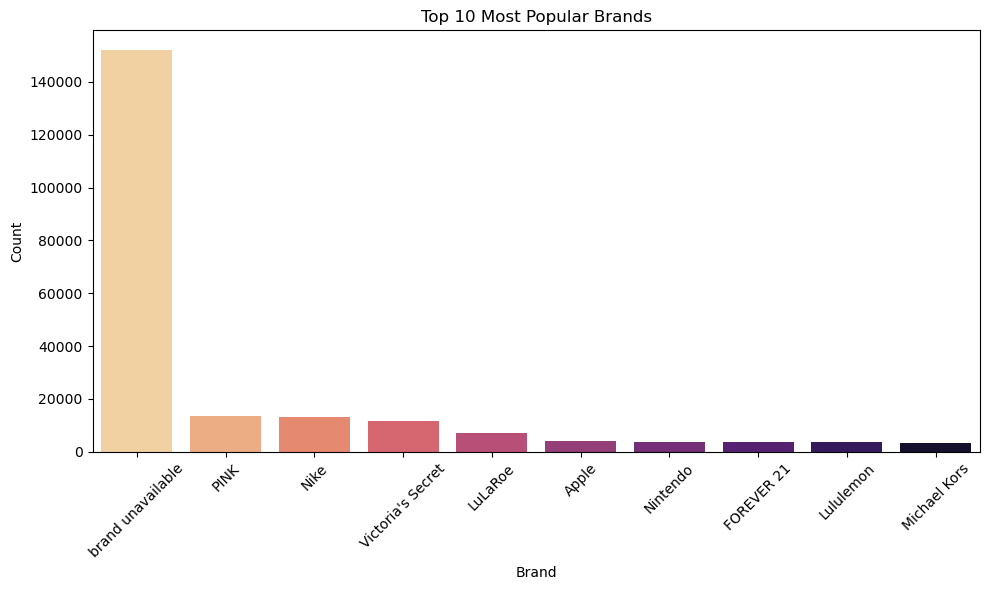

In [53]:
# Finding Top 10 most popular brands
popular_brands = item_list_df['brand_name'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_brands.index, y=popular_brands.values, palette='magma_r')
plt.title('Top 10 Most Popular Brands')
plt.ylabel('Count')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Question 1.10

Item Description Analysis.
• Could you draw the wordcloud chart by using the column clean_description.
• Divide the data with quantiles of the price (using qcut from pandas to obtain the first/sec
ond/third/fourth quantile).
• Draw the wordcould by using the column clean_description on each quantile of price data.

In [54]:
from wordcloud import WordCloud

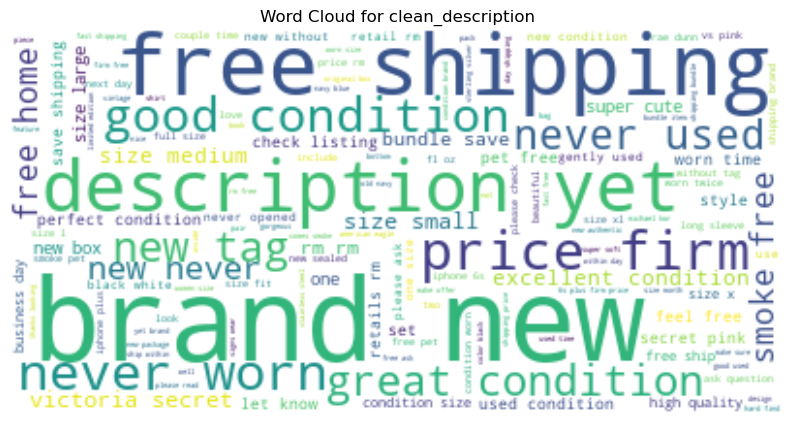

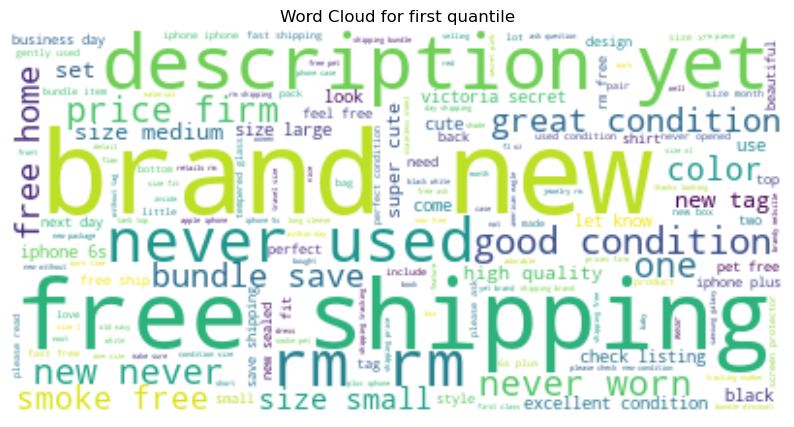

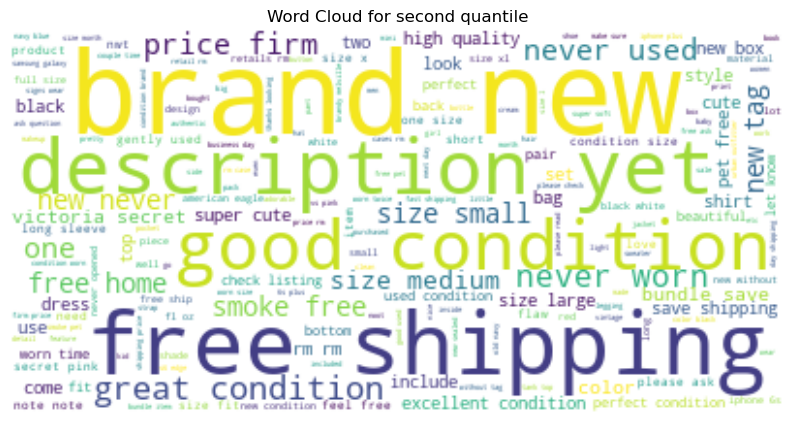

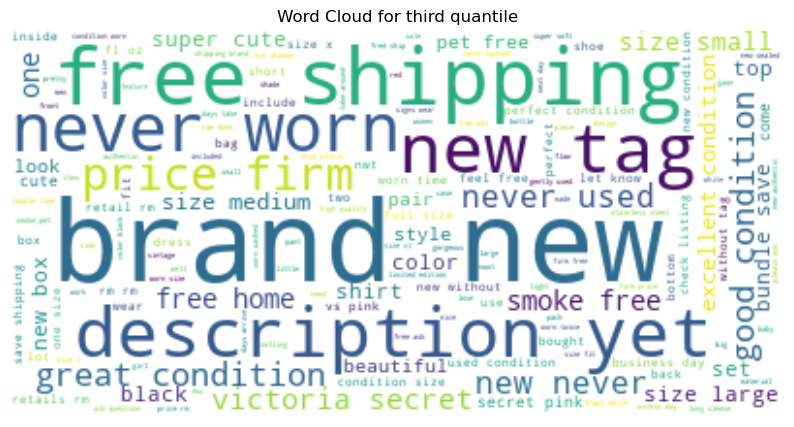

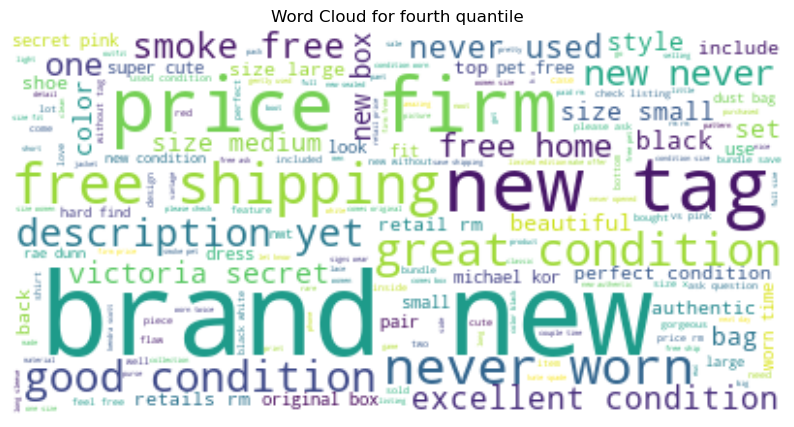

In [55]:
# Forming Word cloud for the whole dataset
text = " ".join(str(desc) for desc in item_list_df.clean_description if isinstance(desc, str))
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for clean_description")
plt.show()

# Dividing data into quantiles
quantiles = pd.qcut(item_list_df['price'], 4, labels=["first", "second", "third", "fourth"])
item_list_df['quantile'] = quantiles

# Forming word clouds for each quantile
for quantile in ["first", "second", "third", "fourth"]:
    subset = item_list_df[item_list_df['quantile'] == quantile]
    text = " ".join(str(desc) for desc in subset.clean_description if isinstance(desc, str))
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {quantile} quantile")
    plt.show()

### <center>End Term Assessment Task Part 2</center>
### <center>Time Series Analysis

Before answering the questions, we will be performing some EDA

In [ ]:
#Read the data set
#First lets download the data from the github, to do that we will use wget command. First we will install the wget command and then download them
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=f25091ae4d43433e49ad84e4db3349313aba8db87df5fd7e84412b63eeb9ca52
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [4]:
#by importing wget and downloading the data from the URL of the github
import wget
link_to_data = "https://raw.githubusercontent.com/tulip-lab/sit742/develop/Jupyter/data/nyc_taxi.csv"
data_1 = wget.download(link_to_data)

In [58]:
#Read the csv data using pandas pd
TS_df = pd.read_csv('/content/nyc_taxi.csv')

In [59]:
#Loading the top data
TS_df.head()

timestamp  value
0  2014-07-01 00:00:00  10844
1  2014-07-01 00:30:00   8127
2  2014-07-01 01:00:00   6210
3  2014-07-01 01:30:00   4656
4  2014-07-01 02:00:00   3820

In [60]:
#Loading the tail data
TS_df.tail()

timestamp  value
10315  2015-01-31 21:30:00  24670
10316  2015-01-31 22:00:00  25721
10317  2015-01-31 22:30:00  27309
10318  2015-01-31 23:00:00  26591
10319  2015-01-31 23:30:00  26288

In [61]:
#Information about the data types
TS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In this date is classified as a object, so we need to convert them as a data time data type

In [62]:
#Describing the stats of the data set
TS_df.describe()

value
count  10320.000000
mean   15137.569380
std     6939.495808
min        8.000000
25%    10262.000000
50%    16778.000000
75%    19838.750000
max    39197.000000

The mean of the values are around 15000 and 75% is around 19800, with max of 39000 it is clear there is outliers in the data set

In [63]:
#Checking for null values
TS_df.isnull().sum()

timestamp    0
value        0
dtype: int64

In [64]:
#Checking for duplicates
TS_df.duplicated().sum()

0

There are no duplicates existing in the data set

**Convert the timestamp from object to datetime datatype**

In [65]:
#using the pandas command .to_datetime, the timestamp is converted to the datatime data type
TS_df['timestamp']=pd.to_datetime(TS_df['timestamp'],format = '%Y-%m-%d')

In [66]:
#Checking the data type for timestamp
TS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


Now the timestamp is converted to datetime

In [67]:
# we extract the year from Date (make sure datetime format for Date)
TS_df['year_month']=TS_df['timestamp'].dt.to_period('M')

In [68]:
# Let's aggregate the values in year level
TS_df.groupby(['year_month'])['value'].agg('sum')

year_month
2014-07    22311198
2014-08    21695693
2014-09    22497659
2014-10    23937235
2014-11    22308660
2014-12    22042382
2015-01    21426889
Freq: M, Name: value, dtype: int64

In [69]:
#Let's try to plot the values in month level, to avoid change the interval on TS_df, we create a new dataframe for this task
df_year_month = pd.DataFrame(TS_df.groupby(['year_month'])['value'].agg('sum'),columns=['value'])

<Axes: xlabel='year_month', ylabel='value'>

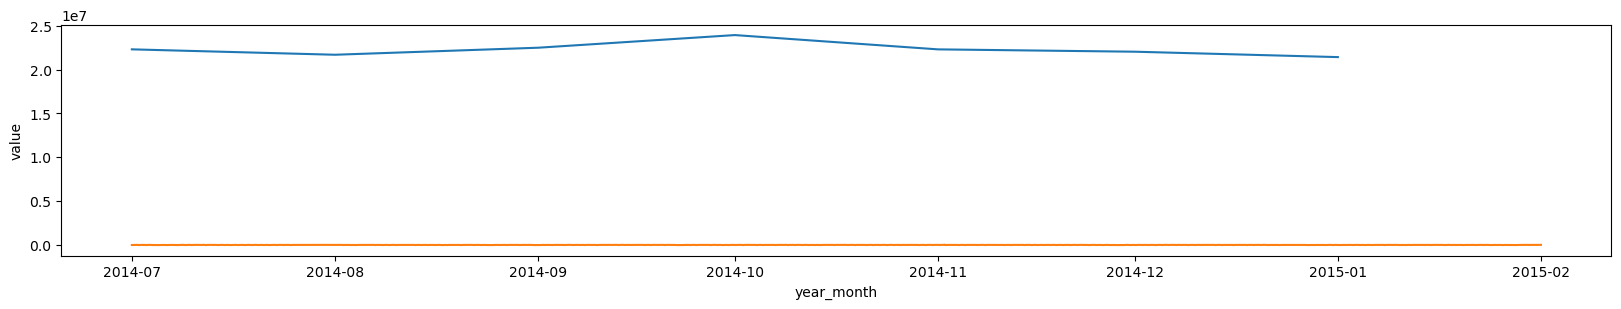

In [70]:
#Lineplot
import seaborn as sns
plt.rcParams["figure.figsize"]=(20,3)
#we might need to convert the index of the new dataframe to timestamp or datetime
sns.lineplot(data=df_year_month,x=df_year_month.index.to_timestamp(),y='value')
#let's compare with the original time series with day level
TS_df.index = TS_df['timestamp']
sns.lineplot(data=TS_df,x='timestamp',y='value')

Looking at the Year Month disagreegation, there is a peak at 2014-10 and remaining is almost flat not much trend line exposed here

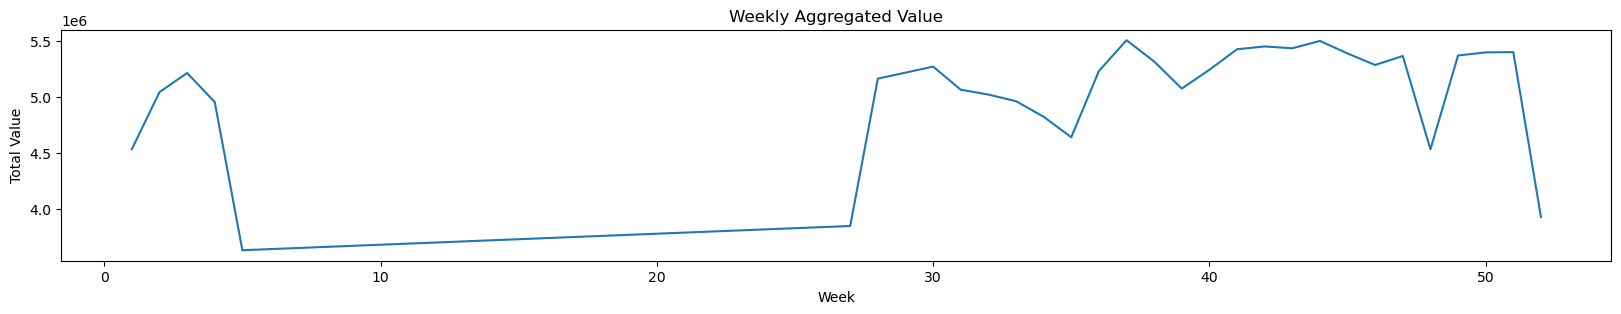

In [71]:
#Line plot for weeks
# Set figure size
plt.rcParams["figure.figsize"] = (20, 3)

# Extract the week from the 'timestamp' column and store it in a new column 'week'
TS_df['week'] = TS_df['timestamp'].dt.week

# Aggregate the data by week
weekly_aggregated = TS_df.groupby(['week'])['value'].agg('sum').reset_index()

# Line plot for weekly aggregated data
sns.lineplot(data=weekly_aggregated, x='week', y='value')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Total Value')
plt.title('Weekly Aggregated Value')

# Show the plot
plt.show()


Looking at the Year-Week demand for the taxi, there is a spike seen after 28th week and there are fluctuations from 30 to 50 week.

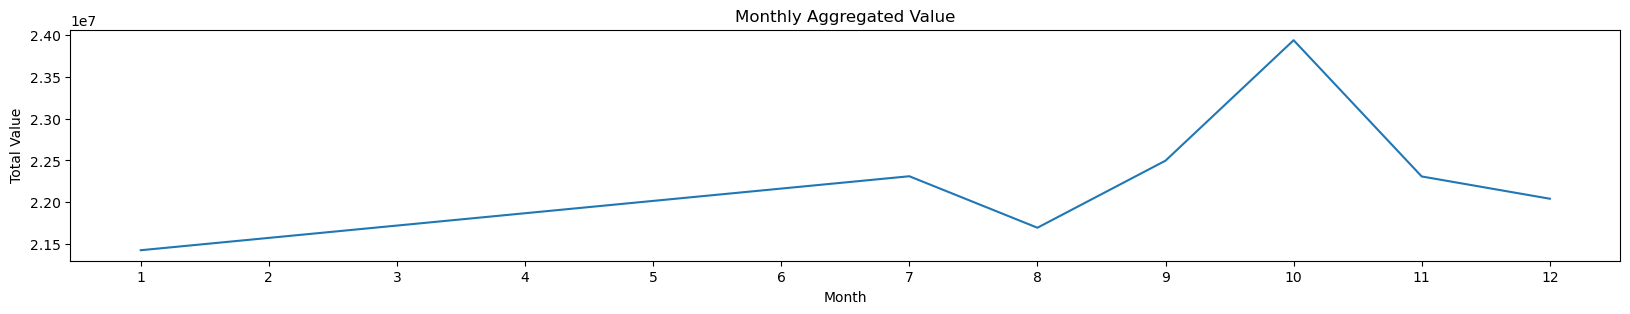

In [72]:
#Line plot for month
# Set figure size
plt.rcParams["figure.figsize"] = (20, 3)

# Extract the month from the 'timestamp' column and store it in a new column 'month'
TS_df['month'] = TS_df['timestamp'].dt.month

# Aggregate the data by month
monthly_aggregated = TS_df.groupby(['month'])['value'].agg('sum').reset_index()

# Line plot for monthly aggregated data
sns.lineplot(data=monthly_aggregated, x='month', y='value')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Value')
plt.title('Monthly Aggregated Value')

# Show the plot
plt.xticks(range(1, 13))  # Set x-axis ticks for months (1 to 12)
plt.show()


Learning the month-year pattern, there is a peak in the month of 10. There is a trend seen from month 1 till 7 where the demand was increasing. On 08th month there is a dip and then there is big spike of taxi demand

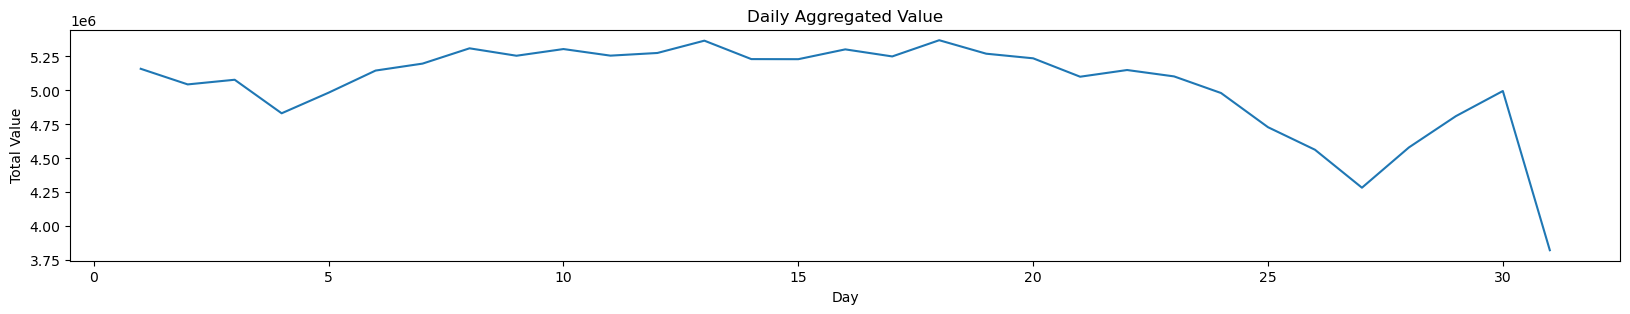

In [73]:
#Line plot by day

# Set figure size
plt.rcParams["figure.figsize"] = (20, 3)

# Extract the day from the 'timestamp' column and store it in a new column 'day'
TS_df['day'] = TS_df['timestamp'].dt.day

# Aggregate the data by day
daily_aggregated = TS_df.groupby(['day'])['value'].agg('sum').reset_index()

# Line plot for daily aggregated data
sns.lineplot(data=daily_aggregated, x='day', y='value')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Total Value')
plt.title('Daily Aggregated Value')

# Show the plot
plt.show()


Learning the pattern on days disagreggation, we could see a seasonality component

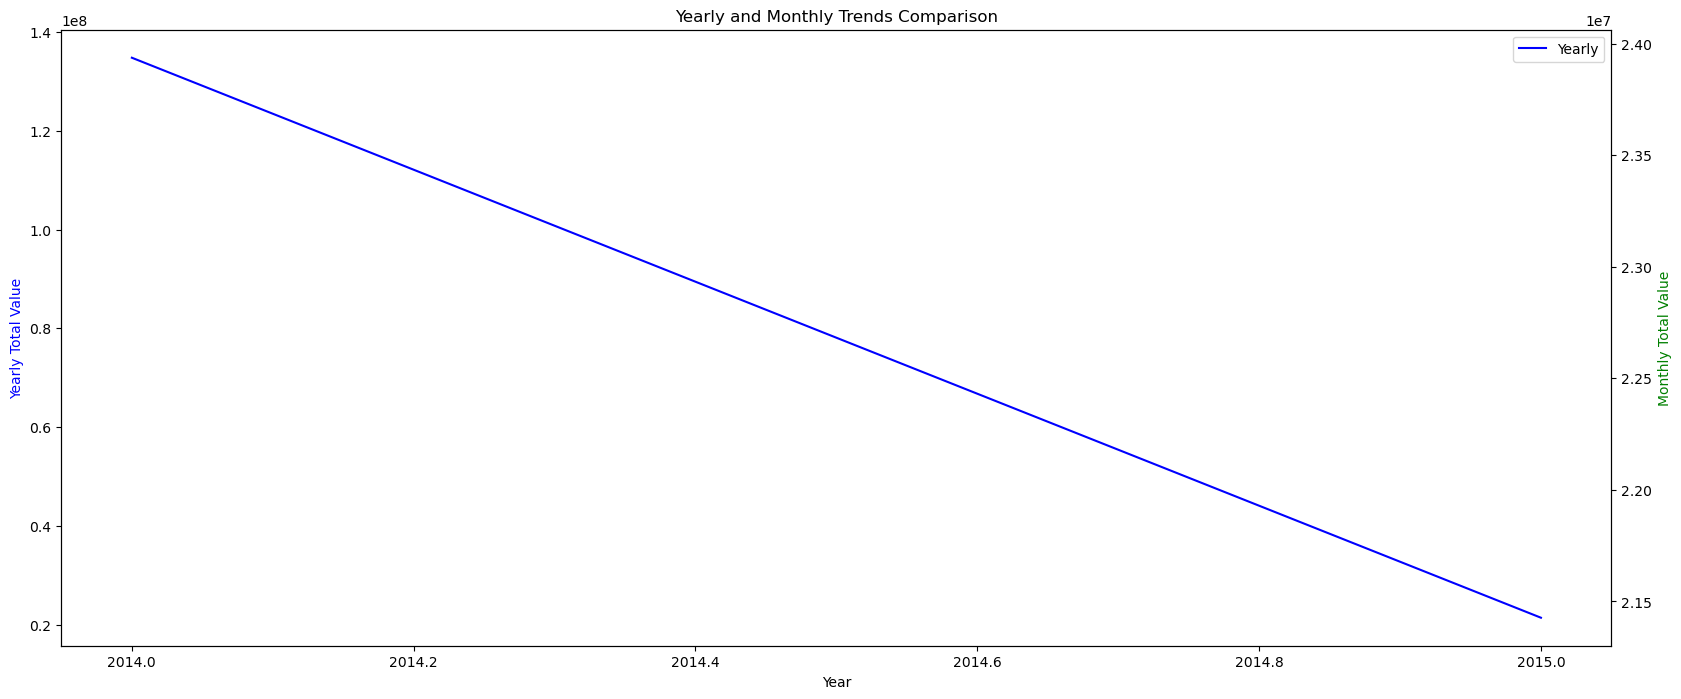

In [74]:
#Year and monthly Comparison

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(20, 8))

# Extract year and month information
TS_df['year'] = TS_df['timestamp'].dt.year
TS_df['month'] = TS_df['timestamp'].dt.month

# Aggregate the data by year and month
yearly_aggregated = TS_df.groupby(['year'])['value'].agg('sum').reset_index()
monthly_aggregated = TS_df.groupby(['year', 'month'])['value'].agg('sum').reset_index()

# Line plot for yearly aggregated data (primary axis)
sns.lineplot(data=yearly_aggregated, x='year', y='value', label='Yearly', ax=ax1, color='blue')

# Create a secondary axis for monthly data
ax2 = ax1.twinx()

# Line plot for monthly aggregated data (secondary axis)
sns.lineplot(data=monthly_aggregated, x='year', y='value', hue='month', ax=ax2, palette='Set2', legend=False)

# Add labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Yearly Total Value', color='blue')
ax2.set_ylabel('Monthly Total Value', color='green')
plt.title('Yearly and Monthly Trends Comparison')

# Show the plot
plt.show()


The trend on the year and month comparison, it clearly shows there is a decreasing trend of demands for the taxi which is not a good sign for the taxi companies

Question 2.1

The dataset used here is the New York City Taxi Demand dataset. The raw data is from the
NYC Taxi and Limousine Commission. The data included here consists of aggregating the total
number of taxi passengers into 30 minute buckets. In this question, we will simply process the
data and explore the time series.
• Create two new dataframes df_day and df_hour by aggregating the demand value on
daily and hourly level.
• Plot the demand value in two line charts for both df_day and df_hour dataframes.
• Plot the seasonal decomposition components (Trend, Seasonal, Residual) from df_day
dataframe, also find out the p value from adfuller test. Do you think the df_day is stationary
enough (please explain your reasons in comments and report)?

**Question 2.1 Part 1 **

Create two new dataframes df_day and df_hour by aggregating the demand value on daily and hourly level.

Plot the demand value in two line charts for both df_day and df_hour dataframes.


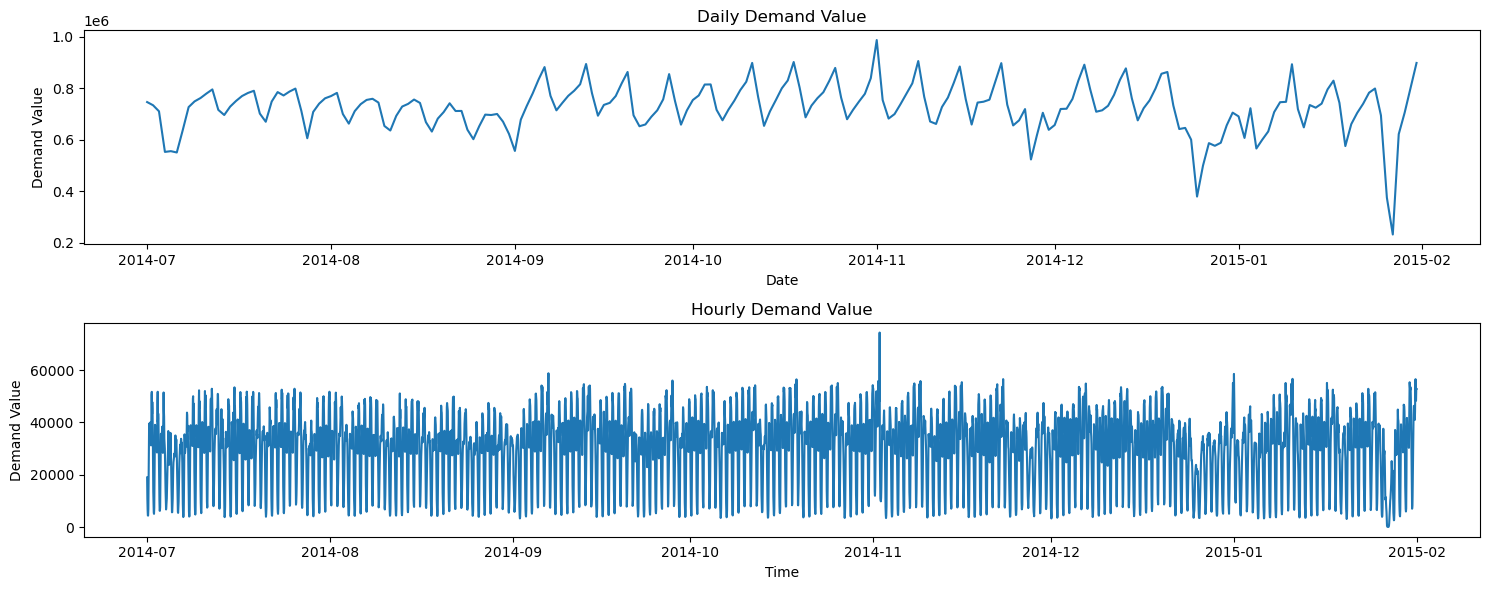

In [75]:
TS_df['timestamp'] = pd.to_datetime(TS_df['timestamp'])

# Create a DataFrame for daily aggregation
df_day = TS_df.resample('D', on='timestamp').sum().reset_index()

# Create a DataFrame for hourly aggregation
df_hour = TS_df.resample('H', on='timestamp').sum().reset_index()

# Set figure size
plt.figure(figsize=(15, 6))

# Plot the demand value on a daily level
plt.subplot(2, 1, 1)
sns.lineplot(data=df_day, x='timestamp', y='value')
plt.title('Daily Demand Value')
plt.xlabel('Date')
plt.ylabel('Demand Value')

# Plot the demand value on an hourly level
plt.subplot(2, 1, 2)
sns.lineplot(data=df_hour, x='timestamp', y='value')
plt.title('Hourly Demand Value')
plt.xlabel('Time')
plt.ylabel('Demand Value')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


Learning the data pattern for the demand vs date - Clearly there is a seasonality existing in days and weeks. Also there is a trend seen in this data with increase from 2014-07 to 2014-11. then decreasing from 2014-11 to 2015-02

Learning the data pattern for the hourly demand, it is clear there is a spike in hours and that could show the seasonality or a peak time where there is high demand for taxi and then there is a drop. This is common and there are lot of examples in this case we can think of, for example morning hours could be peak bacause there will people commuting to work by taxis.

*Question 2.1 Part 2 *

Plot the seasonal decomposition components (Trend, Seasonal, Residual) from df_day dataframe, also find out the p value from adfuller test. Do you think the df_day is stationary enough (please explain your reasons in comments and report)?

**Checking for additive**
The magnitude of the seasonal component is relatively constant or linear across different time points.

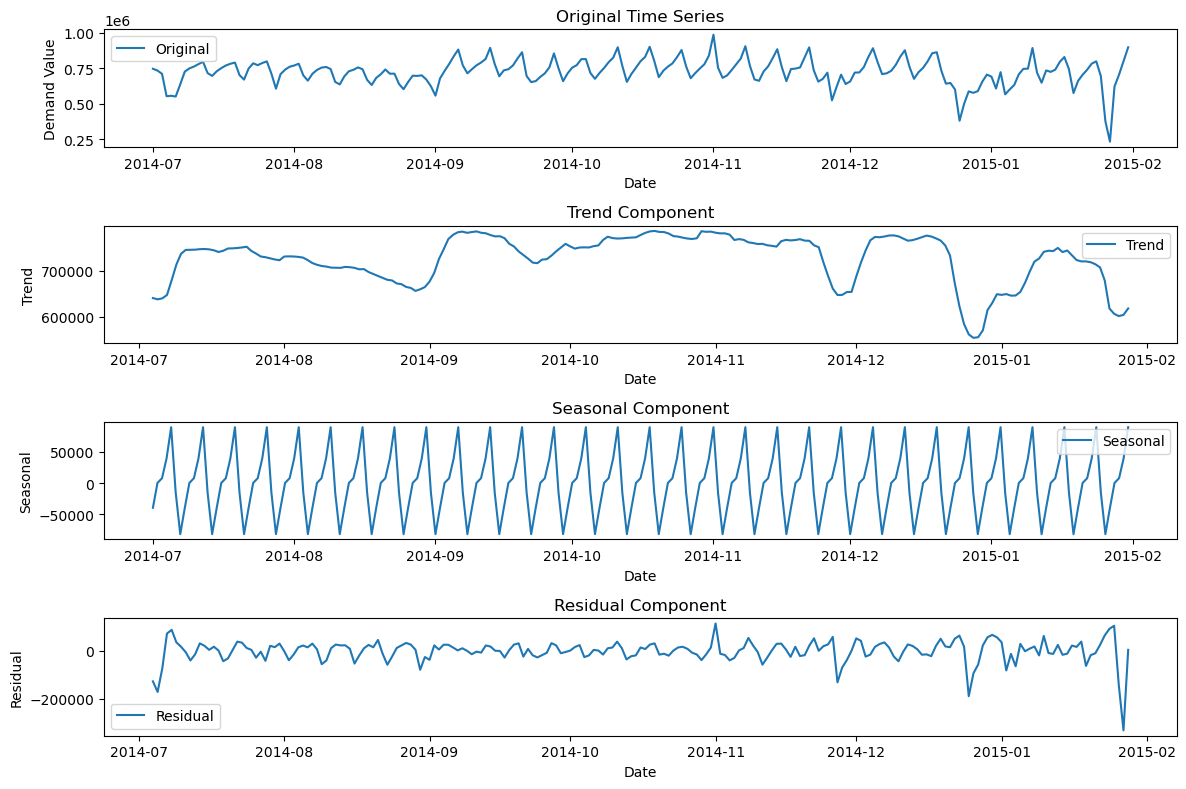

In [76]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Set the frequency of the DataFrame index to 'D' (daily)
# Convert the 'timestamp' column to a datetime object
df_day['timestamp'] = pd.to_datetime(df_day['timestamp'])

# Set 'timestamp' as the index of the DataFrame
df_day.set_index('timestamp', inplace=True)

# Perform seasonal decomposition using additive decomposition with daily frequency
decomposition = sm.tsa.seasonal_decompose(df_day['value'], model='additive')

# Plot the components
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(df_day.index, df_day['value'], label='Original')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Demand Value')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend()

# Residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()




In this case, as the seaonsonal component is constant over time ie in days, hours where there is a spike and then a drop , we have choosen additive decomposition method to show all the components

Trend: There is little bit of trend seen, with decreasing from 2014 -07 to 2014-09, increasing from 2014-09 to 2014-12

Seasonality: Clear seasonality seen every days/weeks and it is very consistent pattern. This regular pattern indicates that demand follows a predictable cycle.

Residual:The residual component shows the errors or variations that occur every month. These errors become exposed and repeat in a consistent manner, It signifies there are specific factors influencing demand on a monthly basis.

In [77]:
# Perform ADF test to check stationarity on the residual component
adf_result = adfuller(decomposition.resid.dropna(), autolag='AIC')
p_value = adf_result[1]

# Interpret the ADF test result
if p_value <= 0.05:
    stationarity_result = "The residual series is likely stationary (p-value <= 0.05)"
else:
    stationarity_result = "The residual series is likely non-stationary (p-value > 0.05)"

print(f"ADF Test p-value: {p_value}")
print(stationarity_result)

ADF Test p-value: 8.31234560511627e-12
The residual series is likely stationary (p-value <= 0.05)


Adfuller test signifies the stationarity based on the hypothesis Null - Hypothesis : The series is not stationary ( P value >0.05 at 95% confidence)

Reject Null Hypothesis : The series is stationary ( Pvalue <=0.05 at 95% confidence)

On the above adfuller testing, the p value is 8.312345605115968e-12 and it is less than 0.05, therefore we need to reject the null hypothesis and prove that series is stationary

**Checking using multiplicative** We are also trying multiplicative approach to crosscheck the seasonality component variation

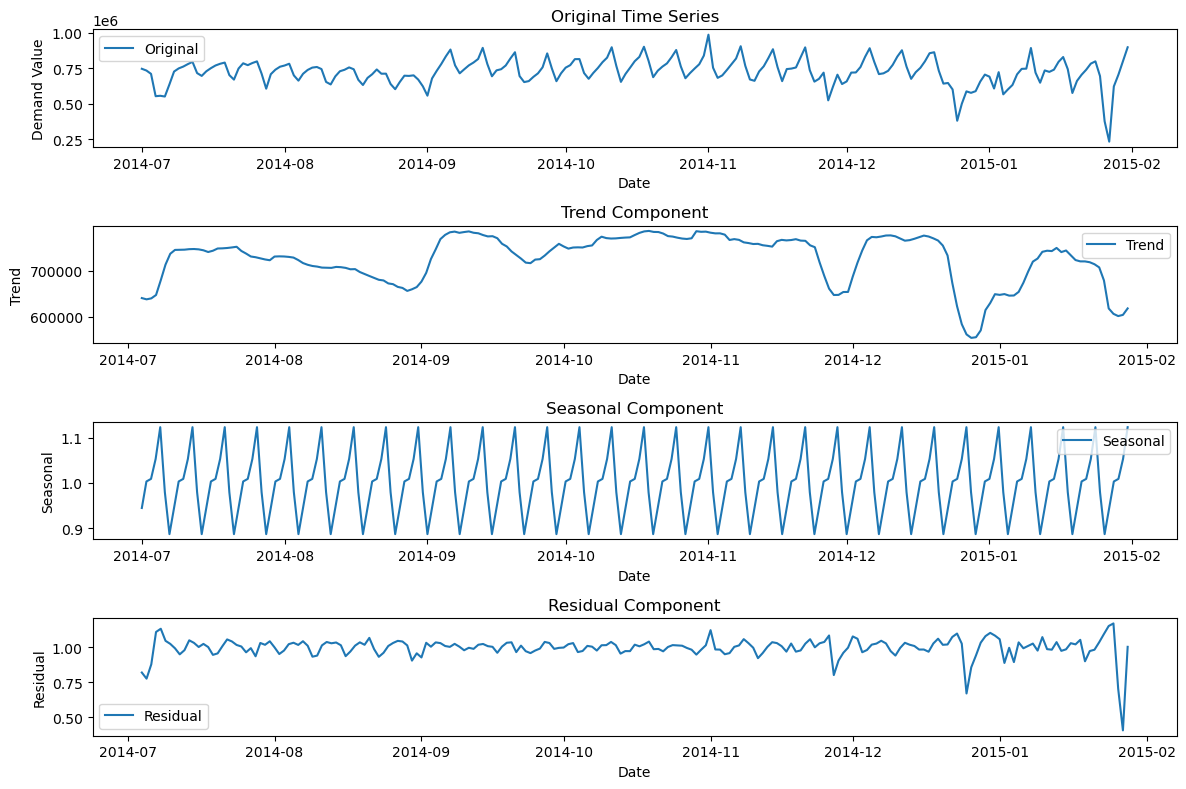

In [78]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Perform seasonal decomposition using additive decomposition with daily frequency
decomposition = sm.tsa.seasonal_decompose(df_day['value'], model='multiplicative')

# Plot the components
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(df_day.index, df_day['value'], label='Original')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Demand Value')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend()

# Residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()




In [79]:
# Perform ADF test to check stationarity on the residual component
adf_result = adfuller(decomposition.resid.dropna(), autolag='AIC')
p_value = adf_result[1]

# Interpret the ADF test result
if p_value <= 0.05:
    stationarity_result = "The residual series is likely stationary (p-value <= 0.05)"
else:
    stationarity_result = "The residual series is likely non-stationary (p-value > 0.05)"

print(f"ADF Test p-value: {p_value}")
print(stationarity_result)

ADF Test p-value: 1.4219497628766293e-11
The residual series is likely stationary (p-value <= 0.05)


For multiplicative:
Adfuller test signifies the stationarity based on the hypothesis Null - Hypothesis : The series is not stationary ( P value >0.05 at 95% confidence)


Reject Null Hypothesis : The series is stationary ( Pvalue <=0.05 at 95% confidence)

On the above adfuller testing, the p value is 8.312345605115968e-12 and it is less than 0.05, therefore we need to reject the null hypothesis and prove that series is stationary

Question 2.2

In this question, we will try to use time series model such as ARIMA and others to build the
model(s) for forecasting the future.
• Create the acf and pacf plots for df_day dataframe.
• Find the best model with different parameters on ARIMA model. The parameter range for
p,d,q are all from [0, 1, 2]. In total, you need to find out the best model with lowest Mean
Abosulate Error from 27 choices based on the time from ”Jul-01-2014” to ”Dec-01-2014”.
• Using the best model in above steps to forecast the time from ”Jan-01-2015” to
”Jan-31-2015”. Plot the predicted value and the true demand value from ”Jan-01-2015” to
”Jan-31-2015”.
• Could you think of any other model (not as same as ARIMA) could do the forecasting for
demand value from ”Jan-01-2015” to ”Jan-31-2015”? You could choose one model
(except ARIMA) and train the model based on the demand value from ”Jul-01-2014” to
”Dec-01-2014” (same training data as the ARIMA). Hint: there are some resources
regarding other time series forecasting models such as prophet here and also the
exponential smoothing here.


In [80]:
#Loading required libraries like 'statsmodels' for ARIMA modeling
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error

In [81]:
df_day

value  week  month   day   year
timestamp                                   
2014-07-01  745967  1296    336    48  96672
2014-07-02  733640  1296    336    96  96672
2014-07-03  710142  1296    336   144  96672
2014-07-04  552565  1296    336   192  96672
2014-07-05  555470  1296    336   240  96672
2014-07-06  550285  1296    336   288  96672
2014-07-07  636570  1344    336   336  96672
2014-07-08  726535  1344    336   384  96672
2014-07-09  748567  1344    336   432  96672
2014-07-10  761596  1344    336   480  96672
2014-07-11  779020  1344    336   528  96672
2014-07-12  795013  1344    336   576  96672
2014-07-13  715651  1344    336   624  96672
2014-07-14  695729  1392    336   672  96672
2014-07-15  728331  1392    336   720  96672
2014-07-16  750480  1392    336   768  96672
2014-07-17  769302  1392    336   816  96672
2014-07-18  781336  1392    336   864  96672
2014-07-19  789771  1392    336   912  96672
2014-07-20  701268  1392    336   960  96672
2014-07-21  669555  1440    336  1008  96672
2014-07-22  747934  1440    336  1056  96672
2014-07-23  784669  1440    336  1104  96672
2014-07-24  771552  1440    336  1152  96672
2014-07-25  786686  1440    336  1200  96672
2014-07-26  798280  1440    336  1248  96672
2014-07-27  711598  1440    336  1296  96672
2014-07-28  605561  1488    336  1344  96672
2014-07-29  707802  1488    336  1392  96672
2014-07-30  739760  1488    336  1440  96672
2014-07-31  760563  1488    336  1488  96672
2014-08-01  769160  1488    384    48  96672
2014-08-02  781616  1488    384    96  96672
2014-08-03  699449  1488    384   144  96672
2014-08-04  662215  1536    384   192  96672
2014-08-05  710728  1536    384   240  96672
2014-08-06  737803  1536    384   288  96672
2014-08-07  754260  1536    384   336  96672
2014-08-08  758688  1536    384   384  96672
2014-08-09  743986  1536    384   432  96672
2014-08-10  653183  1536    384   480  96672
2014-08-11  635503  1584    384   528  96672
2014-08-12  692472  1584    384   576  96672
2014-08-13  728588  1584    384   624  96672
2014-08-14  738931  1584    384   672  96672
2014-08-15  755739  1584    384   720  96672
2014-08-16  742592  1584    384   768  96672
2014-08-17  667964  1584    384   816  96672
2014-08-18  631430  1632    384   864  96672
2014-08-19  681756  1632    384   912  96672
2014-08-20  707241  1632    384   960  96672
2014-08-21  741183  1632    384  1008  96672
2014-08-22  711225  1632    384  1056  96672
2014-08-23  711571  1632    384  1104  96672
2014-08-24  638602  1632    384  1152  96672
2014-08-25  601875  1680    384  1200  96672
2014-08-26  652836  1680    384  1248  96672
2014-08-27  697228  1680    384  1296  96672
2014-08-28  695717  1680    384  1344  96672
2014-08-29  699744  1680    384  1392  96672
2014-08-30  669853  1680    384  1440  96672
2014-08-31  622555  1680    384  1488  96672
2014-09-01  556314  1728    432    48  96672
2014-09-02  677879  1728    432    96  96672
2014-09-03  730834  1728    432   144  96672
2014-09-04  779510  1728    432   192  96672
2014-09-05  833762  1728    432   240  96672
2014-09-06  881714  1728    432   288  96672
2014-09-07  770168  1728    432   336  96672
2014-09-08  713881  1776    432   384  96672
2014-09-09  742722  1776    432   432  96672
2014-09-10  770248  1776    432   480  96672
2014-09-11  790045  1776    432   528  96672
2014-09-12  815022  1776    432   576  96672
2014-09-13  893651  1776    432   624  96672
2014-09-14  779930  1776    432   672  96672
2014-09-15  693044  1824    432   720  96672
2014-09-16  734885  1824    432   768  96672
2014-09-17  742949  1824    432   816  96672
2014-09-18  769405  1824    432   864  96672
2014-09-19  818322  1824    432   912  96672
2014-09-20  862756  1824    432   960  96672
2014-09-21  694510  1824    432  1008  96672
2014-09-22  652135  1872    432  1056  96672
2014-09-23  659009  1872    432  1104  96672
2014-09-24  688789  1872    432  1152  96672
2014-09-25  713845  1872    432  1200  96672
2014-09-

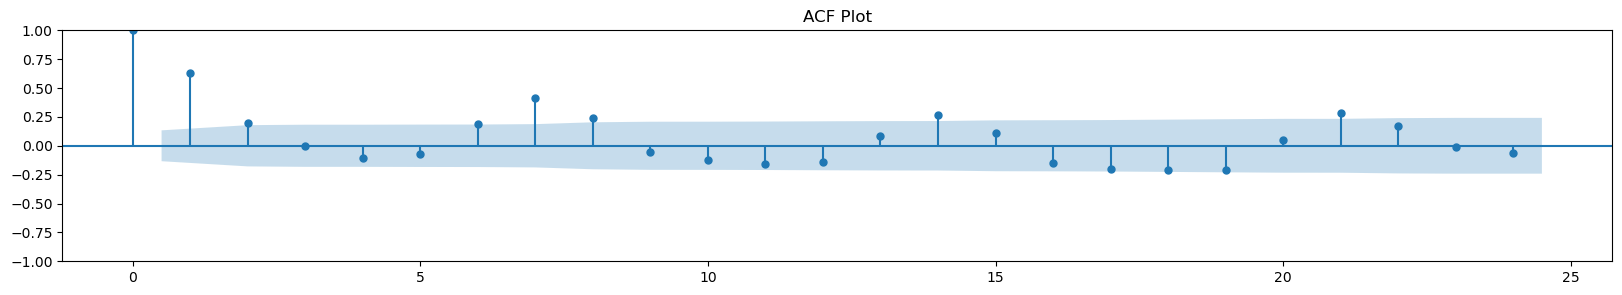

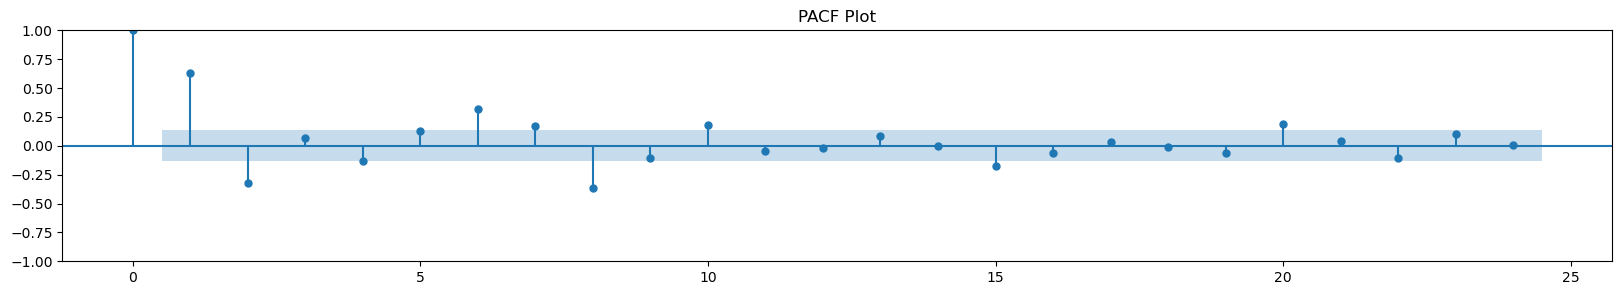

In [82]:
# ACF plot
plot_acf(df_day['value'])
plt.title('ACF Plot')
plt.show()

# PACF plot
plot_pacf(df_day['value'])
plt.title('PACF Plot')
plt.show()

In [83]:
train = df_day['Jul-01-2014':'Dec-01-2014']

In [85]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

best_mae = float('inf')
best_order = None

for p in [0,1,2]:
    for d in [0,1,2]:
        for q in [0,1,2]:
            try:
                model = ARIMA(train['value'], order=(p,d,q))
                model_fit = model.fit()
                predictions = model_fit.forecast(steps=len(train))
                mae = mean_absolute_error(train['value'], predictions)
                if mae < best_mae:
                    best_mae = mae
                    best_order = (p,d,q)
            except:
                continue

print(f"Best ARIMA order is {best_order} with MAE of {best_mae}")


Best ARIMA order is (0, 0, 0) with MAE of 57020.771546635195


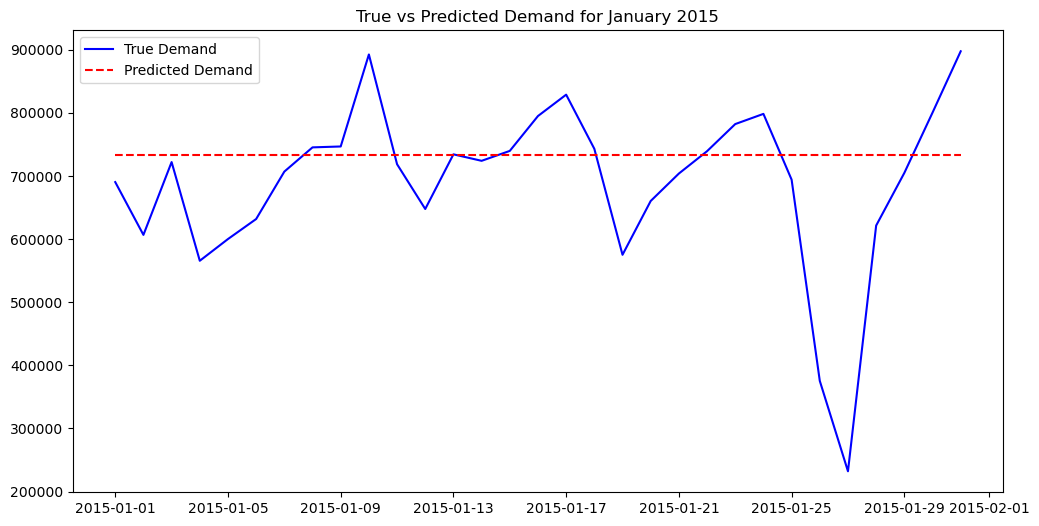

In [86]:
# Using best_order obtained (0,0,0) values
train_full = df_day['Jul-01-2014':'Dec-31-2014']
test = df_day['Jan-01-2015':'Jan-31-2015']

# Fitting the best ARIMA model on the full training data
best_model = ARIMA(train_full['value'], order=best_order)
results = best_model.fit()

# Forecast for January 2015
forecast_arima = results.forecast(steps=len(test))

# Plotting predicted values against true values
plt.figure(figsize=(12,6))
plt.plot(test['value'], label="True Demand", color='blue')
plt.plot(test.index, forecast_arima, label="Predicted Demand", color='red', linestyle='--')
plt.legend()
plt.title("True vs Predicted Demand for January 2015")
plt.show()


Exponential Smoothing

----------

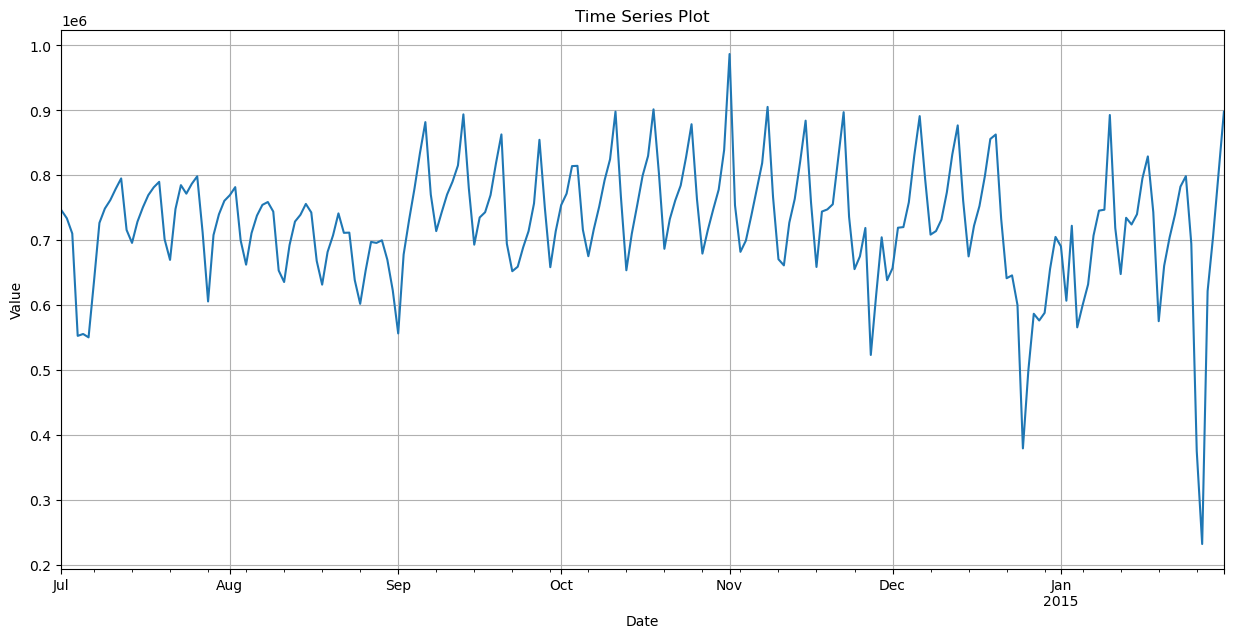

In [87]:
plt.figure(figsize=(15, 7))
df_day['value'].plot(title="Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [88]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_day['value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("Data is stationary")
else:
    print("Data is non-stationary")


ADF Statistic: -3.4480944520753565
p-value: 0.009424599993717583
Critical Values: {'1%': -3.4626576734812318, '5%': -2.8757444215841326, '10%': -2.5743412314098753}
Data is stationary


In [89]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


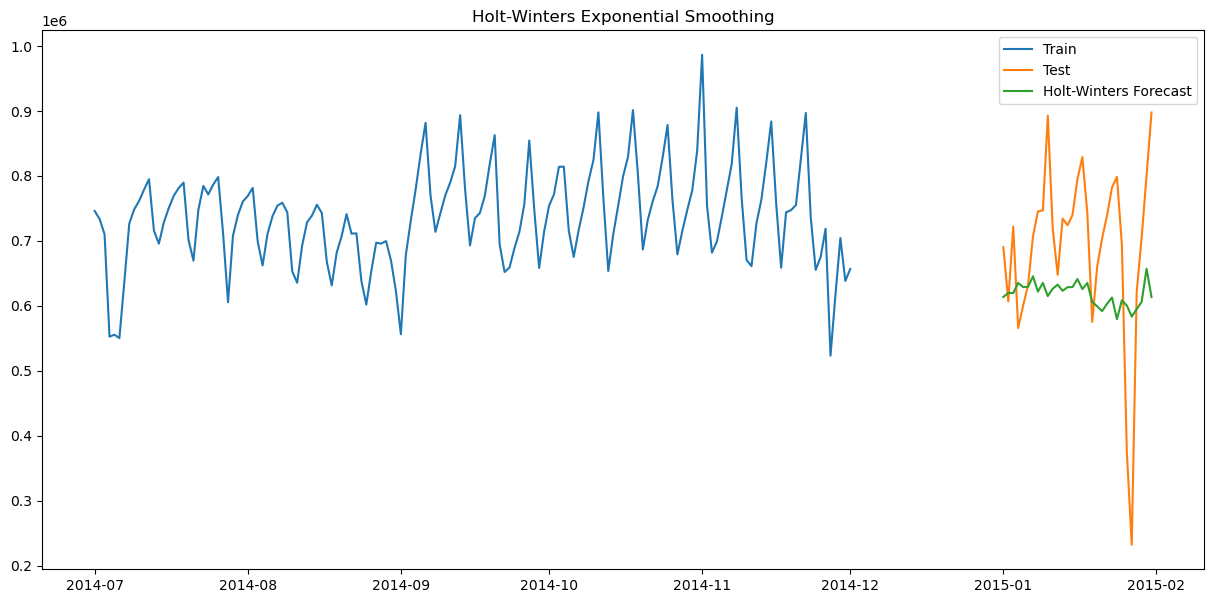

In [90]:
model = ExponentialSmoothing(train['value'], trend=None, seasonal='add', seasonal_periods=30)
model_fit = model.fit()
forecast_smoothing = model_fit.forecast(steps=31)
plt.figure(figsize=(15, 7))
plt.plot(train.index, train['value'], label='Train')
plt.plot(test.index, test['value'], label='Test')
plt.plot(test.index, forecast_smoothing, label='Holt-Winters Forecast')
plt.legend(loc='best')
plt.title('Holt-Winters Exponential Smoothing')
plt.show()


In [91]:
mae = mean_absolute_error(test['value'], forecast_smoothing)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 119417.14687615029


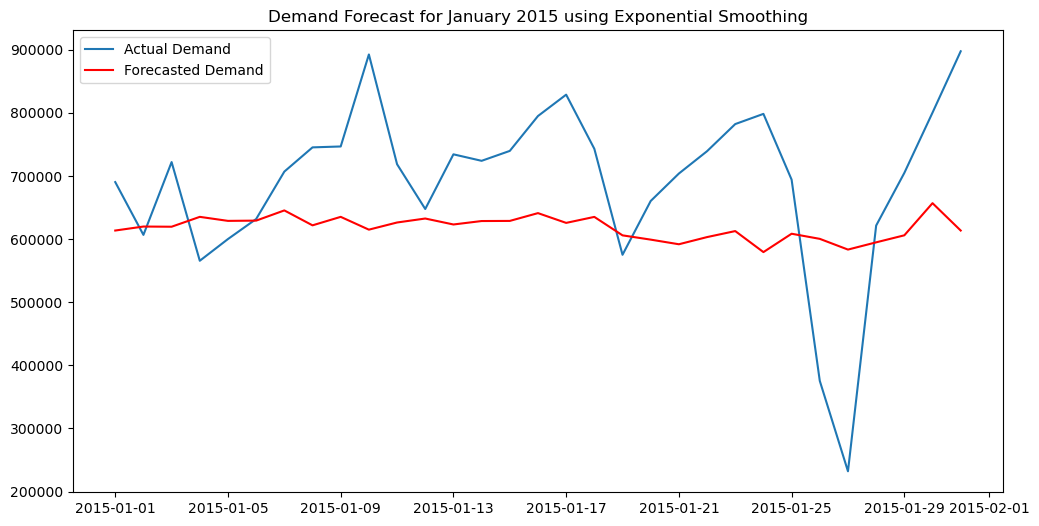

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(df_day['Jan-01-2015':'Jan-31-2015']['value'], label="Actual Demand")
plt.plot(df_day['Jan-01-2015':'Jan-31-2015'].index, forecast_smoothing, label="Forecasted Demand", color='red')
plt.title("Demand Forecast for January 2015 using Exponential Smoothing")
plt.legend()
plt.show()


In [93]:
january_actuals = df_day['Jan-01-2015':'Jan-31-2015']['value']
mae_ets = mean_absolute_error(january_actuals, forecast_smoothing)
print(f"MAE for Exponential Smoothing: {mae_ets}")


MAE for Exponential Smoothing: 119417.14687615029


Exponential Smoothing:
MAE: 119417.14687615029
RMSE: 145450.01355052067
MAPE: 11.12296262808392%

ARIMA:
MAE: 87916.63096072935
RMSE: 137135.6758370914
MAPE: 18.78285741498239%


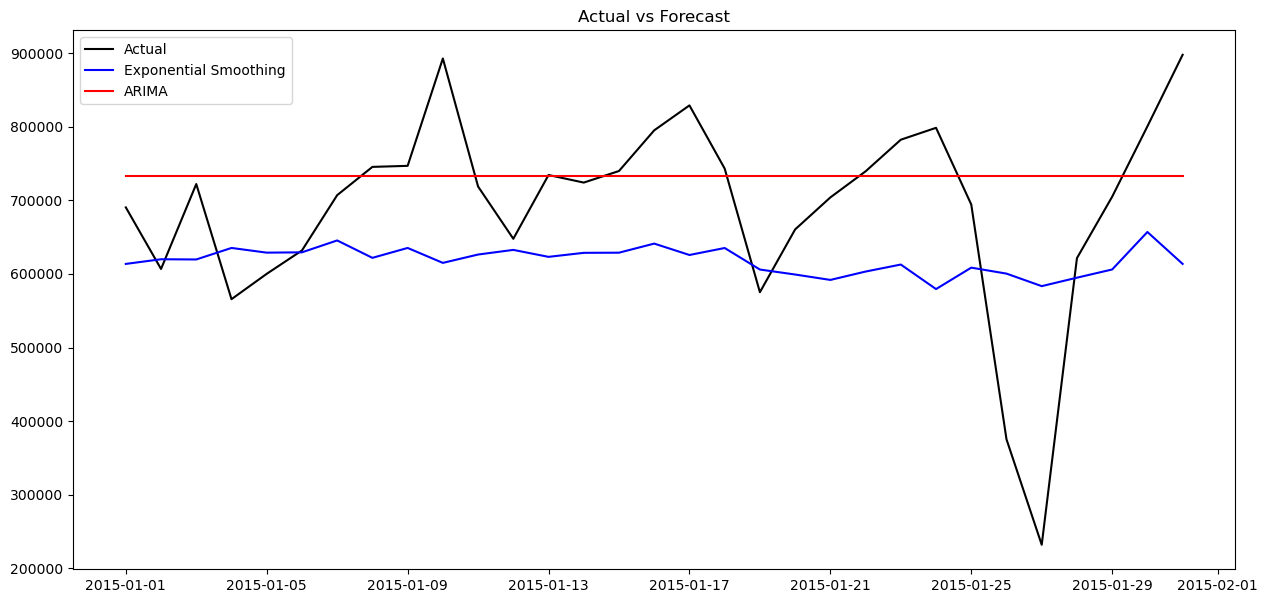

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Metrics for Exponential Smoothing
mae_smoothing = mean_absolute_error(test['value'], forecast_smoothing)
rmse_smoothing = np.sqrt(mean_squared_error(test['value'], forecast_smoothing))
mape_smoothing = np.mean(np.abs((test['value'] - forecast_smoothing) / test['value'])) * 100

# Metrics for ARIMA
mae_arima = mean_absolute_error(test['value'], forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(test['value'], forecast_arima))
mape_arima = np.mean(np.abs((test['value'] - forecast_arima) / test['value'])) * 100

# Print Metrics
print("Exponential Smoothing:")
print(f"MAE: {mae_smoothing}")
print(f"RMSE: {rmse_smoothing}")
print(f"MAPE: {mape_smoothing}%")
print("\nARIMA:")
print(f"MAE: {mae_arima}")
print(f"RMSE: {rmse_arima}")
print(f"MAPE: {mape_arima}%")

# Visual Comparison
plt.figure(figsize=(15, 7))
plt.plot(test.index, test['value'], label='Actual', color='black')
plt.plot(test.index, forecast_smoothing, label='Exponential Smoothing', color='blue')
plt.plot(test.index, forecast_arima, label='ARIMA', color='red')
plt.title('Actual vs Forecast')
plt.legend()
plt.show()


Question 2.3

In this question, we will detect the anomaly within the df_day dataframe.
• Create the Weekday column according to the timestamp column in df_day dataframe. The
value in Weekday column should be from [’Monday’, ’Tuesday’, ’Wednesday’,
’Thursday’,’Friday’, ’Saturday’, ’Sunday’]. Also create the Hour, Day, Month, Year,
Month_day (numeric format on day of the month), Lag (yesterday’s demand value ), and
Rolling_Mean (rolling 7 days mean demand value, minimized period is 1) 7 new columns
in df_day dataframe according to the timestamp column.
• Using Isolation Forest with above crafted features in df_day to find out the date which is
identified as ’outlier’.

#### Original data

In [108]:
TS_df.head()

timestamp  value year_month  week  month  day  \
timestamp                                                                     
2014-07-01 00:00:00 2014-07-01 00:00:00  10844    2014-07    27      7    1   
2014-07-01 00:30:00 2014-07-01 00:30:00   8127    2014-07    27      7    1   
2014-07-01 01:00:00 2014-07-01 01:00:00   6210    2014-07    27      7    1   
2014-07-01 01:30:00 2014-07-01 01:30:00   4656    2014-07    27      7    1   
2014-07-01 02:00:00 2014-07-01 02:00:00   3820    2014-07    27      7    1   

                     year  
timestamp                  
2014-07-01 00:00:00  2014  
2014-07-01 00:30:00  2014  
2014-07-01 01:00:00  2014  
2014-07-01 01:30:00  2014  
2014-07-01 02:00:00  2014

#### extracting timestamp and values

In [109]:
df_day_temp=TS_df[['timestamp','value']]

#### Creating day-wise data

In [110]:
day_wise_data=df_day_temp.resample('D', on='timestamp').sum()

In [111]:
day_wise_data.head()

value
timestamp         
2014-07-01  745967
2014-07-02  733640
2014-07-03  710142
2014-07-04  552565
2014-07-05  555470

In [112]:
day_wise_data.shape

(215, 1)

#### Calulcating Lag

In [113]:
day_wise_data['lag']=day_wise_data['value'].shift()

#### Using mean value fill the first data point

In [117]:
mean_lag=day_wise_data['lag'].mean()
print(mean_lag)

725803.7242990654


In [118]:
day_wise_data=day_wise_data.reset_index()

In [122]:
day_wise_data['lag'].fillna((day_wise_data['lag'].mean()), inplace=True)

In [123]:
day_wise_data

timestamp   value            lag
0   2014-07-01  745967  725803.724299
1   2014-07-02  733640  745967.000000
2   2014-07-03  710142  733640.000000
3   2014-07-04  552565  710142.000000
4   2014-07-05  555470  552565.000000
5   2014-07-06  550285  555470.000000
6   2014-07-07  636570  550285.000000
7   2014-07-08  726535  636570.000000
8   2014-07-09  748567  726535.000000
9   2014-07-10  761596  748567.000000
10  2014-07-11  779020  761596.000000
11  2014-07-12  795013  779020.000000
12  2014-07-13  715651  795013.000000
13  2014-07-14  695729  715651.000000
14  2014-07-15  728331  695729.000000
15  2014-07-16  750480  728331.000000
16  2014-07-17  769302  750480.000000
17  2014-07-18  781336  769302.000000
18  2014-07-19  789771  781336.000000
19  2014-07-20  701268  789771.000000
20  2014-07-21  669555  701268.000000
21  2014-07-22  747934  669555.000000
22  2014-07-23  784669  747934.000000
23  2014-07-24  771552  784669.000000
24  2014-07-25  786686  771552.000000
25  2014-07-26  798280  786686.000000
26  2014-07-27  711598  798280.000000
27  2014-07-28  605561  711598.000000
28  2014-07-29  707802  605561.000000
29  2014-07-30  739760  707802.000000
30  2014-07-31  760563  739760.000000
31  2014-08-01  769160  760563.000000
32  2014-08-02  781616  769160.000000
33  2014-08-03  699449  781616.000000
34  2014-08-04  662215  699449.000000
35  2014-08-05  710728  662215.000000
36  2014-08-06  737803  710728.000000
37  2014-08-07  754260  737803.000000
38  2014-08-08  758688  754260.000000
39  2014-08-09  743986  758688.000000
40  2014-08-10  653183  743986.000000
41  2014-08-11  635503  653183.000000
42  2014-08-12  692472  635503.000000
43  2014-08-13  728588  692472.000000
44  2014-08-14  738931  728588.000000
45  2014-08-15  755739  738931.000000
46  2014-08-16  742592  755739.000000
47  2014-08-17  667964  742592.000000
48  2014-08-18  631430  667964.000000
49  2014-08-19  681756  631430.000000
50  2014-08-20  707241  681756.000000
51  2014-08-21  741183  707241.000000
52  2014-08-22  711225  741183.000000
53  2014-08-23  711571  711225.000000
54  2014-08-24  638602  711571.000000
55  2014-08-25  601875  638602.000000
56  2014-08-26  652836  601875.000000
57  2014-08-27  697228  652836.000000
58  2014-08-28  695717  697228.000000
59  2014-08-29  699744  695717.000000
60  2014-08-30  669853  699744.000000
61  2014-08-31  622555  669853.000000
62  2014-09-01  556314  622555.000000
63  2014-09-02  677879  556314.000000
64  2014-09-03  730834  677879.000000
65  2014-09-04  779510  730834.000000
66  2014-09-05  833762  779510.000000
67  2014-09-06  881714  833762.000000
68  2014-09-07  770168  881714.000000
69  2014-09-08  713881  770168.000000
70  2014-09-09  742722  713881.000000
71  2014-09-10  770248  742722.000000
72  2014-09-11  790045  770248.000000
73  2014-09-12  815022  790045.000000
74  2014-09-13  893651  815022.000000
75  2014-09-14  779930  893651.000000
76  2014-09-15  693044  779930.000000
77  2014-09-16  734885  693044.000000
78  2014-09-17  742949  734885.000000
79  2014-09-18  769405  742949.000000
80  2014-09-19  818322  769405.000000
81  2014-09-20  862756  818322.000000
82  2014-09-21  694510  862756.000000
83  2014-09-22  652135  694510.000000
84  2014-09-23  659009  652135.000000
85  2014-09-24  688789  659009.000000
86  2014-09-25  713845  688789.000000
87  2014-09-26  756482  713845.000000
88  2014-09-27  854486  756482.000000
89  2014-09-28  749204  854486.000000
90  2014-09-29  658328  749204.000000
91  2014-09-30  713830  658328.000000
92  2014-10-01  753936  713830.000000
93  2014-10-02  771639  753936.000000
94  2014-10-03  813973  771639.000000
95  2014-10-04  814396  813973.000000
96  2014-10-05  715853  814396.000000
97  2014-10-06  675219  715853.000000
98  2014-10-07  716494  675219.000000
99  2014-10-08  751608  716494.000000
100 2014-10-09  792472  751608.000000
101 2014-10-10  824508  792472.000000
102 2014-10-11  897908  824508.000000
103 2014-10-12  766463  897908.000000
104 2014-10-13 

#### Creating week_day, day,month ,year,hour and rolling mean

In [124]:
day_wise_data['week_day'] = day_wise_data['timestamp'].dt.day_name()
day_wise_data['day'] = day_wise_data['timestamp'].dt.day
day_wise_data['month'] = day_wise_data['timestamp'].dt.month
day_wise_data['year'] = day_wise_data['timestamp'].dt.year
#hour value is zero as we resampled the data based on the day for the timestamp
day_wise_data['hour'] = day_wise_data['timestamp'].dt.hour
day_wise_data['rolling_mean']=day_wise_data.rolling(on='timestamp',window=7,min_periods=1).value.mean()

In [126]:
day_wise_data.head()

timestamp   value            lag   week_day  day  month  year  hour  \
0 2014-07-01  745967  725803.724299    Tuesday    1      7  2014     0   
1 2014-07-02  733640  745967.000000  Wednesday    2      7  2014     0   
2 2014-07-03  710142  733640.000000   Thursday    3      7  2014     0   
3 2014-07-04  552565  710142.000000     Friday    4      7  2014     0   
4 2014-07-05  555470  552565.000000   Saturday    5      7  2014     0   

    rolling_mean  
0  745967.000000  
1  739803.500000  
2  729916.333333  
3  685578.500000  
4  659556.800000

#### Ordinal Encoding week day using a dictionary

In [127]:
week_day_dict={
    'Sunday':0,
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6
}

In [128]:
day_wise_data['week_day_encoded']=day_wise_data['week_day'].replace(week_day_dict)

In [130]:
day_wise_data.head()

timestamp   value            lag   week_day  day  month  year  hour  \
0 2014-07-01  745967  725803.724299    Tuesday    1      7  2014     0   
1 2014-07-02  733640  745967.000000  Wednesday    2      7  2014     0   
2 2014-07-03  710142  733640.000000   Thursday    3      7  2014     0   
3 2014-07-04  552565  710142.000000     Friday    4      7  2014     0   
4 2014-07-05  555470  552565.000000   Saturday    5      7  2014     0   

    rolling_mean  week_day_encoded  
0  745967.000000                 2  
1  739803.500000                 3  
2  729916.333333                 4  
3  685578.500000                 5  
4  659556.800000                 6

#### Dropping the week_day non encoded column

In [131]:
X=day_wise_data.drop('week_day',axis=1)

In [132]:
X.head()

timestamp   value            lag  day  month  year  hour   rolling_mean  \
0 2014-07-01  745967  725803.724299    1      7  2014     0  745967.000000   
1 2014-07-02  733640  745967.000000    2      7  2014     0  739803.500000   
2 2014-07-03  710142  733640.000000    3      7  2014     0  729916.333333   
3 2014-07-04  552565  710142.000000    4      7  2014     0  685578.500000   
4 2014-07-05  555470  552565.000000    5      7  2014     0  659556.800000   

   week_day_encoded  
0                 2  
1                 3  
2                 4  
3                 5  
4                 6

#### Creating timestamp index to make a timeseries data

In [133]:
from sklearn.ensemble import IsolationForest

In [134]:
X=X.set_index('timestamp')

#### Using Isolation forest detect outliers

In [135]:
model=IsolationForest(n_estimators=100,max_samples=len(day_wise_data),contamination='auto',random_state=42,verbose=0)

In [136]:
predicted_annomalies=model.fit_predict(X)

In [137]:
score=model.decision_function(X)

In [138]:
X['outlier']=predicted_annomalies
X['annomly_scores']=score

#### Marking outliers as Yes and No from -1 and 1 values as predicted by model

In [139]:
map_dict={1: "No",-1:"Yes"}
X["outlier"] = X["outlier"].map(map_dict)

In [141]:
X.head()

value            lag  day  month  year  hour   rolling_mean  \
timestamp                                                                  
2014-07-01  745967  725803.724299    1      7  2014     0  745967.000000   
2014-07-02  733640  745967.000000    2      7  2014     0  739803.500000   
2014-07-03  710142  733640.000000    3      7  2014     0  729916.333333   
2014-07-04  552565  710142.000000    4      7  2014     0  685578.500000   
2014-07-05  555470  552565.000000    5      7  2014     0  659556.800000   

            week_day_encoded outlier  annomly_scores  
timestamp                                             
2014-07-01                 2      No        0.042214  
2014-07-02                 3      No        0.060784  
2014-07-03                 4      No        0.055569  
2014-07-04                 5     Yes       -0.011886  
2014-07-05                 6     Yes       -0.083712

#### Plotting outlier data

In [142]:
annomalyDf=X[['value','outlier']] #Create new df where non outliers are marked as NAN,so that we can plot the outliers

In [143]:
annomalyDf['value'] = annomalyDf['value'].where(annomalyDf['outlier'] == 'Yes', np.nan)

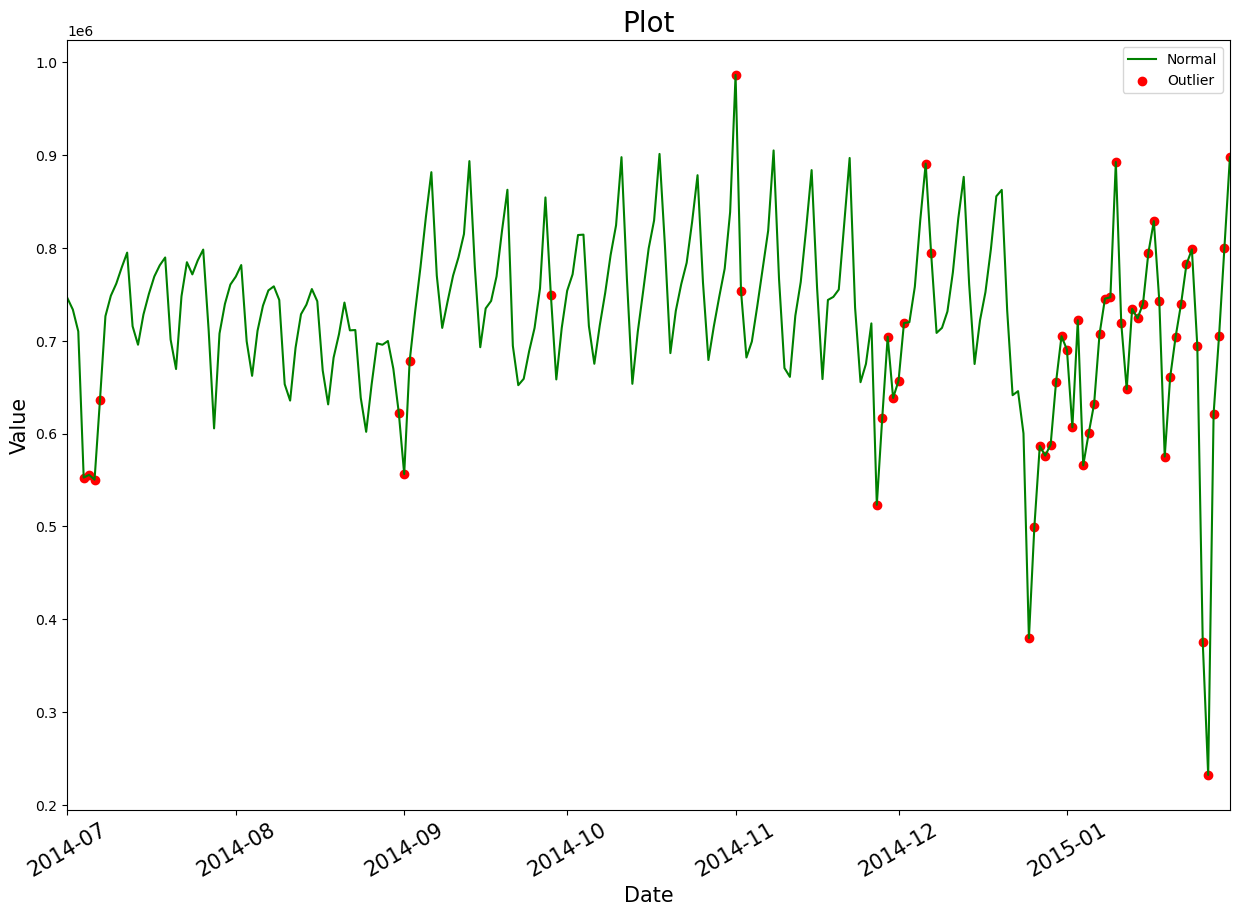

In [144]:
fig = plt.subplots(figsize=(15, 10))
plt.plot(X.index,X['value'],color='green',label='Normal')
plt.scatter(annomalyDf.index,annomalyDf['value'],color='red',label='Outlier')
plt.title('Plot',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.xticks(rotation=30,fontsize=15)
plt.xlim(pd.Timestamp('2014-07-01'), pd.Timestamp('2015-01-31'))
plt.legend()
